<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
    
Привет Григорий! Меня зовут Даниил Вяжев, я буду проверять твой проект

Сразу хочу обратить внимание на цветовую разметку:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Зеленым с пометкой ✔️ отмечены отличные решения и идеи, которые можно и нужно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Желтым с пометкой ⚠️ отмечено то, что можно или нужно оптимизировать, в зависимости от контекста.</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Красным с пометкой ❌ обозначены пропущенные пункты задания и ошибки, которые обязательно надо будет исправить, чтобы результаты были верные.</div> 
    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме перечисленных.**
Также я попрошу тебя **не менять, не передвигать и не удалять мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
        
<hr>
    
<font color= 'dodgerblue'>**По проекту:**</font> 
    
Григорий, ты проделал основательную работу над задачей классификации. От предварительной обработки данных до обучения и оптимизации моделей твой подход был систематичным и продуманным. Ты грамотно использовал возможности CatBoost для работы с категориальными признаками, обеспечил воспроизводимость экспериментов через MLFlow и провел анализ значимости признаков, что добавляет глубины твоей работе.

Однако важно учитывать, что качество финальной модели оказалось не самым высоким. Это может быть связано с ограниченным числом отобранных признаков и особенностями данных. Также есть моменты, которые стоит доработать: например, более тщательно обрабатывать пропуски и аномалии в данных, дополнительно проверить балансировку классов и разнообразить подходы к оптимизации гиперпараметров. Низкие метрики указывают на то, что есть потенциал для улучшения, например, за счет использования дополнительных признаков или альтернативных методов работы с несбалансированными данными. Так же я заметил довольно таки серьезную ошибку с переменной модели, которую видимо ты случайно перепутал с другой, это нужно будет обязательно исправить. Все замечания я оставил в коде.

В целом твоя работа демонстрирует хороший уровень понимания методов машинного обучения и умение решать реальные задачи. Ты на правильном пути, буду ждать твой проект с исправлениями обратно!
    
<hr style="border-top: 3px solid purple; "></hr>
Комментарии можешь оставлять с помощью такого кода в Markdown ячейке:
    
    
    <div class="alert alert-info">
    <h2> Комментарий студента</h2>

    Тут текст.
    </div>
    
    
    <font color='red'> Этот код позволяет менять цвет текста. </font>     


  

О том, как **форматировать текст** в Markdown ячейке или как добавлять ссылки, ты можешь узнать [тут](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet) и [вот тут](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd).



Желаю удачи!

<img src="https://user-images.githubusercontent.com/74038190/225813708-98b745f2-7d22-48cf-9150-083f1b00d6c9.gif" width="500">
</div>    


# Рекомендации банковских продуктов

Цель: предсказать, какими финансовыми услугами клиенты банка воспользуются в следующем месяце, исходя из их характеристик и истории поведения. Это поможет улучшить таргетинг предложений, оптимизировать маркетинговые затраты и повысить удовлетворенность клиентов.

Основные задачи: 
1. Анализ данных о клиентах (EDA) для выявления закономерностей и особенностей.
2. Определение ключевых метрик успеха с учетом бизнес-целей.
3. Моделирование поведения клиентов с использованием методов машинного обучения.

## Основные метрики

Для задачи многофакторной классификации (multi-label classification), с учетом специфики бизнес-задачи, ключевыми метриками будут:
- F1-Score
- Precision
- Recall

<font color='blue'>Добавил описание ноутбука</font>

# Инициализация
Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [291]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.impute import SimpleImputer
import os
import mlflow
from joblib import Memory
import joblib
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
from catboost import CatBoostClassifier, Pool
from tqdm.notebook import tqdm
import cloudpickle
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from dotenv import load_dotenv
from mlflow.models.signature import infer_signature

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
from dotenv import load_dotenv импортируется дважды. Нужно удалить одну из строк.
</div>


<font color='blue'>Убрал лишний импорт</font>

In [62]:
load_dotenv(override=True)

True

In [67]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [68]:
pd.options.mode.chained_assignment = None

In [69]:
# Настраиваем подключение к MLFlow и удаленному хранилищу
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = "final_pr_eda_experiment"
RUN_NAME = "eda_model"

assets_dir = "artifacts"
os.makedirs(assets_dir, exist_ok=True)

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Не хватает описания проекта и его задач. С описанием проект выглядит более презентабельно и ты сможешь быстро вспомнить, что в нем было, когда к нему вернешься.
</div>


## Загрузка первичных данных
Загружаем первичные данные из файла:

train_ver2.csv

In [70]:
data = pd.read_csv("./train_ver2.csv")

/var/folders/jg/38zlc6616vl3gdy84xc0lx4w0000gn/T/ipykernel_11974/2684295200.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./train_ver2.csv")


## Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [71]:
data.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [73]:
data.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Можно заметить, что значение в колонке ```tipodom``` одинаковое для всех записей, удалим её

In [74]:
data['tipodom'].value_counts()

1.0    13619574
Name: tipodom, dtype: int64

In [75]:
data.drop(columns=['tipodom'], inplace=True)

In [76]:
# Удалим столбец nomprov так как он не бдует использоваться в дальнейшем
data.drop(columns=['nomprov'], inplace=True)

In [77]:
# Проверяем пропущенные значения
data.isna().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
cod_prov                    93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_ult1               0
ind_ctma_fin_ult1               0
ind_ctop_fin_u

In [78]:
# Заполним колонки с числовыми значениями и приведем их к типу numeric
numeric_columns = ['age', 'antiguedad', 'renta']

for col in numeric_columns:
    data[col] = data[col].astype(str).str.strip()
    data[col] = data[col].replace(['NA', ''], np.nan)
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(data[col].median())

In [79]:
# Удалим колонки с большим количеством пропусков (более 99% в нашем случае)
data.drop(columns=['ult_fec_cli_1t', 'conyuemp'], inplace=True)

In [80]:
# Найдем колонки, которые могут быть описаны как бинарные
boolean_columns = [
    col for col in data.columns 
    if data[col].nunique() == 2
]
data[boolean_columns].sample(3, random_state=42)

,sexo,ind_nuevo,indrel,indresi,indext,indfall,ind_actividad_cliente,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
2406613,H,0.0,1.0,S,N,N,1.0,0,0,0,...,0,0,0,0,1,0,0,0.0,0.0,0
6466267,H,0.0,1.0,S,N,N,0.0,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
10239289,V,0.0,1.0,S,N,N,0.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [109]:
# Исправим данные в колонке indrel_1mes
data['indrel_1mes'] = pd.to_numeric(data['indrel_1mes'], errors='coerce')
data['indrel_1mes'] = data['indrel_1mes'].fillna(-1)
data['indrel_1mes'] = data['indrel_1mes'].astype(str)

In [110]:
# Приведем типы данных
datetime_columns = ['fecha_dato', 'fecha_alta']
categorical_columns = [
    'ind_empleado', 'pais_residencia', 'indrel_1mes', 'tiprel_1mes', 
    'canal_entrada', 'indfall', 'segmento'
]

for col in datetime_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

for col in categorical_columns:
    data[col] = data[col].fillna('unknown').astype('category')

for col in boolean_columns:
    if col in ['indresi', 'indext', 'indfall']:
        data[col] = data[col].map({'S': True, 'N': False})
    elif col == 'sexo':
        data[col] = data[col].map({'H': True, 'V': False})

    data[col] = data[col].fillna(False).astype(bool).infer_objects()

In [83]:
# Проверяем дубликаты
data.duplicated().sum()

0

Явные дубликаты в данных отсутствуют

In [84]:
# Количество уникальных клиентов
data['ncodpers'].nunique()

956645

В результате мы избавись от пропущеных значений в некатегориальных столбцах, привели типы данных к более удобным для использования и тем самым значительно оптимизировали работу с памятью. 

# EDA

In [85]:
# Посмотрим распределения целевых переменных
target_columns = [col for col in data.columns if col.startswith('ind_') and col.endswith('_ult1')]

column_names = {
    "ind_ahor_fin_ult1": "Сберегательный счёт",
    "ind_aval_fin_ult1": "Банковская гарантия",
    "ind_cco_fin_ult1": "Текущие счета",
    "ind_cder_fin_ult1": "Деривативный счёт",
    "ind_cno_fin_ult1": "Зарплатный проект",
    "ind_ctju_fin_ult1": "Детский счёт",
    "ind_ctma_fin_ult1": "Особый счёт 3",
    "ind_ctop_fin_ult1": "Особый счёт",
    "ind_ctpp_fin_ult1": "Особый счёт 2",
    "ind_deco_fin_ult1": "Краткосрочный депозит",
    "ind_deme_fin_ult1": "Среднесрочный депозит",
    "ind_dela_fin_ult1": "Долгосрочный депозит",
    "ind_ecue_fin_ult1": "Цифровой счёт",
    "ind_fond_fin_ult1": "Денежные средства",
    "ind_hip_fin_ult1": "Ипотека",
    "ind_plan_fin_ult1": "Пенсионный план",
    "ind_pres_fin_ult1": "Кредит",
    "ind_reca_fin_ult1": "Налоговый счёт",
    "ind_tjcr_fin_ult1": "Кредитная карта",
    "ind_valo_fin_ult1": "Ценные бумаги",
    "ind_viv_fin_ult1": "Домашний счёт",
    "ind_nomina_ult1": "Аккаунт для выплаты зарплаты",
    "ind_nom_pens_ult1": "Аккаунт для пенсионных обязательств",
    "ind_recibo_ult1": "Дебетовый аккаунт",
}

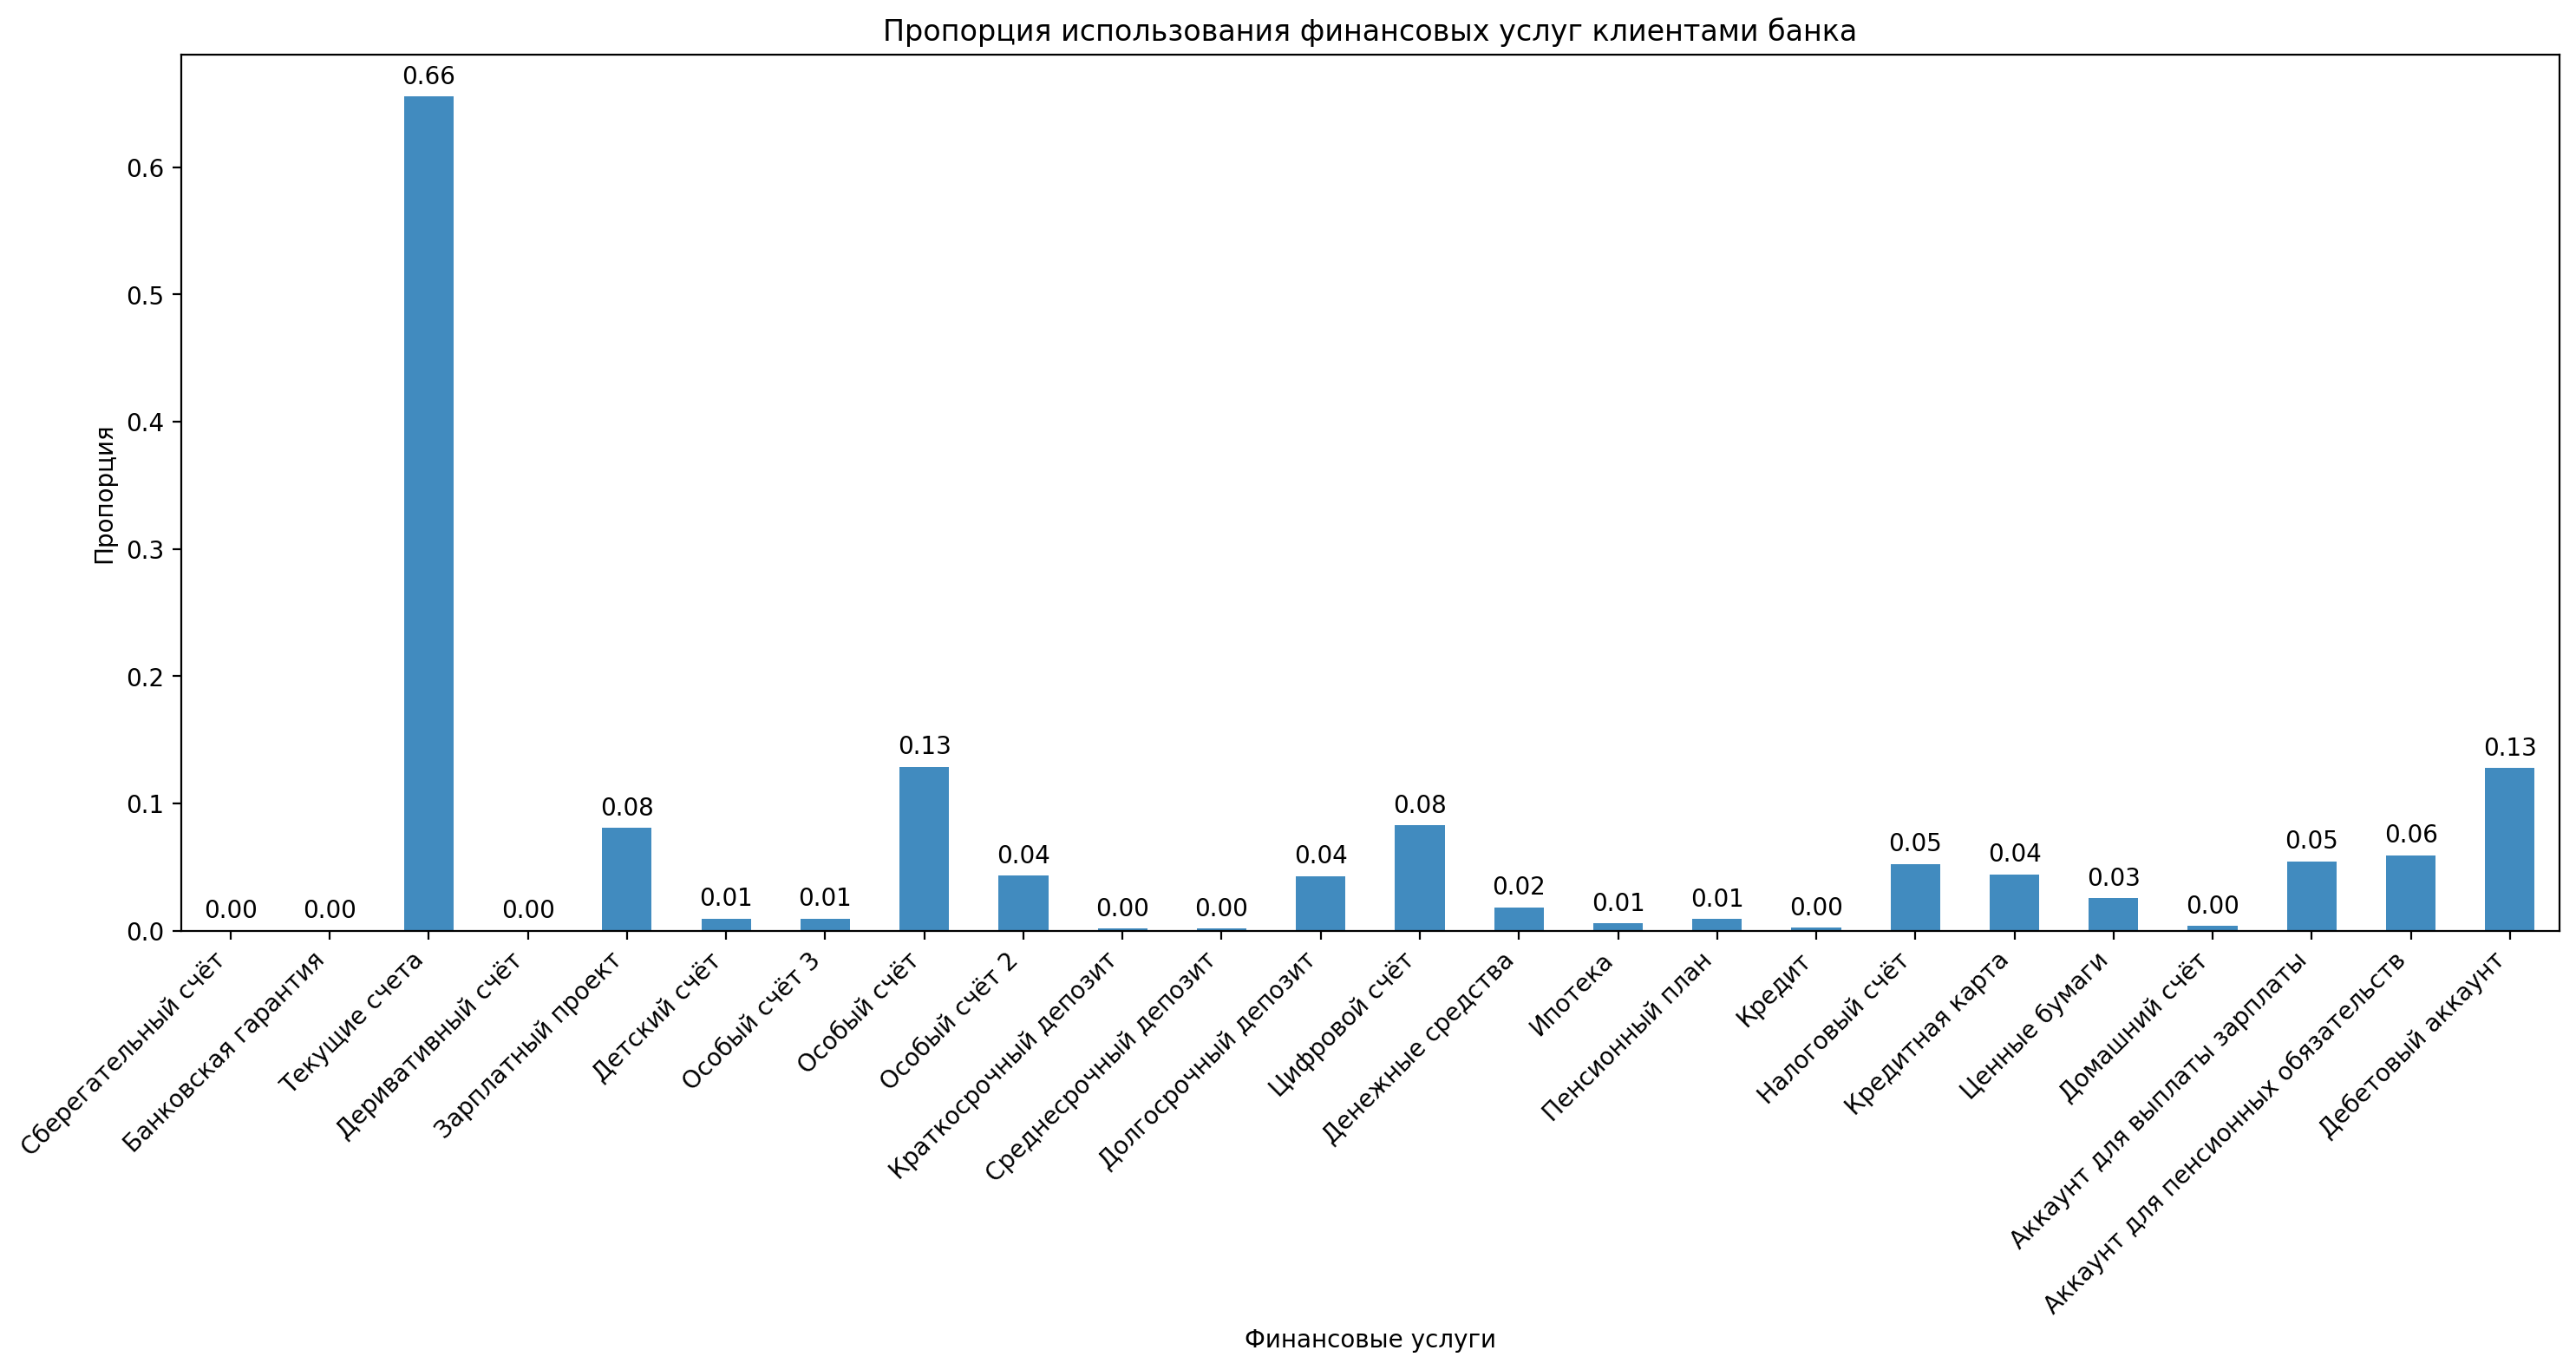

In [86]:
mean_values = data[target_columns].mean()

mean_values = mean_values.rename(index=column_names)

fig, ax = plt.subplots(figsize=(15, 8))

mean_values.plot(kind="bar", color="#1f77b4", alpha=0.85, ax=ax)

for idx, value in enumerate(mean_values):
    ax.text(idx, value + 0.01, f"{value:.2f}", ha='center', fontsize=10)

ax.set_title("Пропорция использования финансовых услуг клиентами банка")
ax.set_ylabel("Пропорция")
ax.set_xlabel("Финансовые услуги")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [87]:
mean_values.sort_values(ascending=False)[:5]

Текущие счета        0.655484
Особый счёт          0.129008
Дебетовый аккаунт    0.127916
Цифровой счёт        0.082744
Зарплатный проект    0.080867
dtype: float64

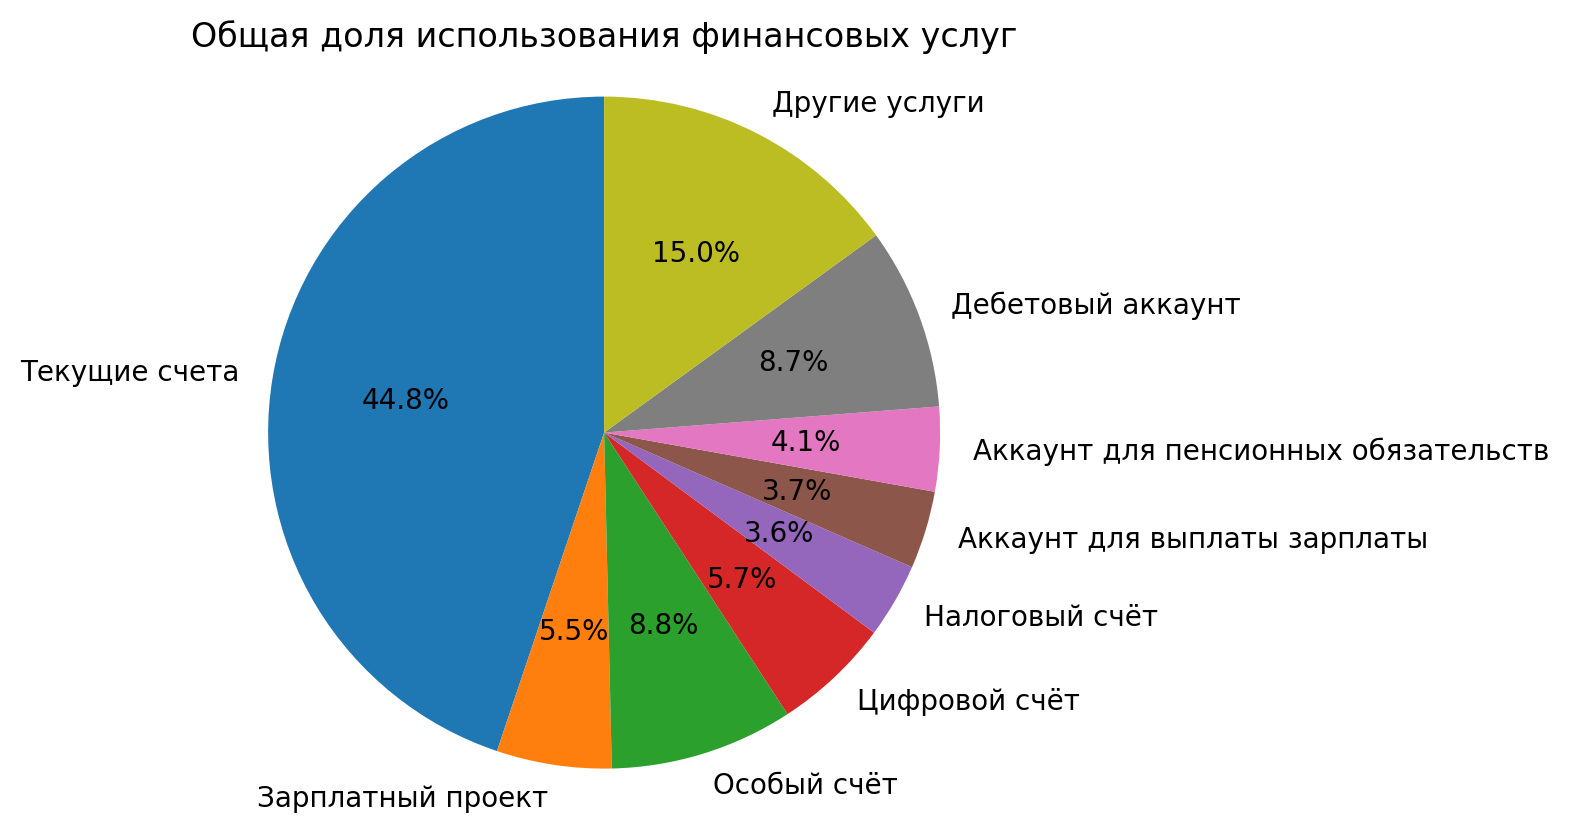

In [88]:
threshold = 0.05

others = mean_values[mean_values < threshold].sum()
chart_values = mean_values[mean_values >= threshold]
chart_values["Другие услуги"] = others

plt.pie(
    chart_values, 
    labels=chart_values.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Общая доля использования финансовых услуг")
plt.axis('equal')
plt.show()

Наиболее популярные услуги среди клиентов банка:
1. Текущие счета ```ind_cco_fin_ult1```: 65.5% клиентов имеют данную услугу. Это ожидаемо, так как банковский счет обычно является базовым продуктом.
2. Особый счёт ```ind_ctop_fin_ult1```: пользуются 12.9% клиентов.
3. Дебетовый аккаунт ```ind_recibo_ult1```: им пользуются 12.7% клиентов.
4. Цифровой счет ```ind_ecue_fin_ult1```: на него приходится 8.2% клиентов.
5. Зарплатный проект ```ind_cno_fin_ult1```: популярен у 8% клиентов.

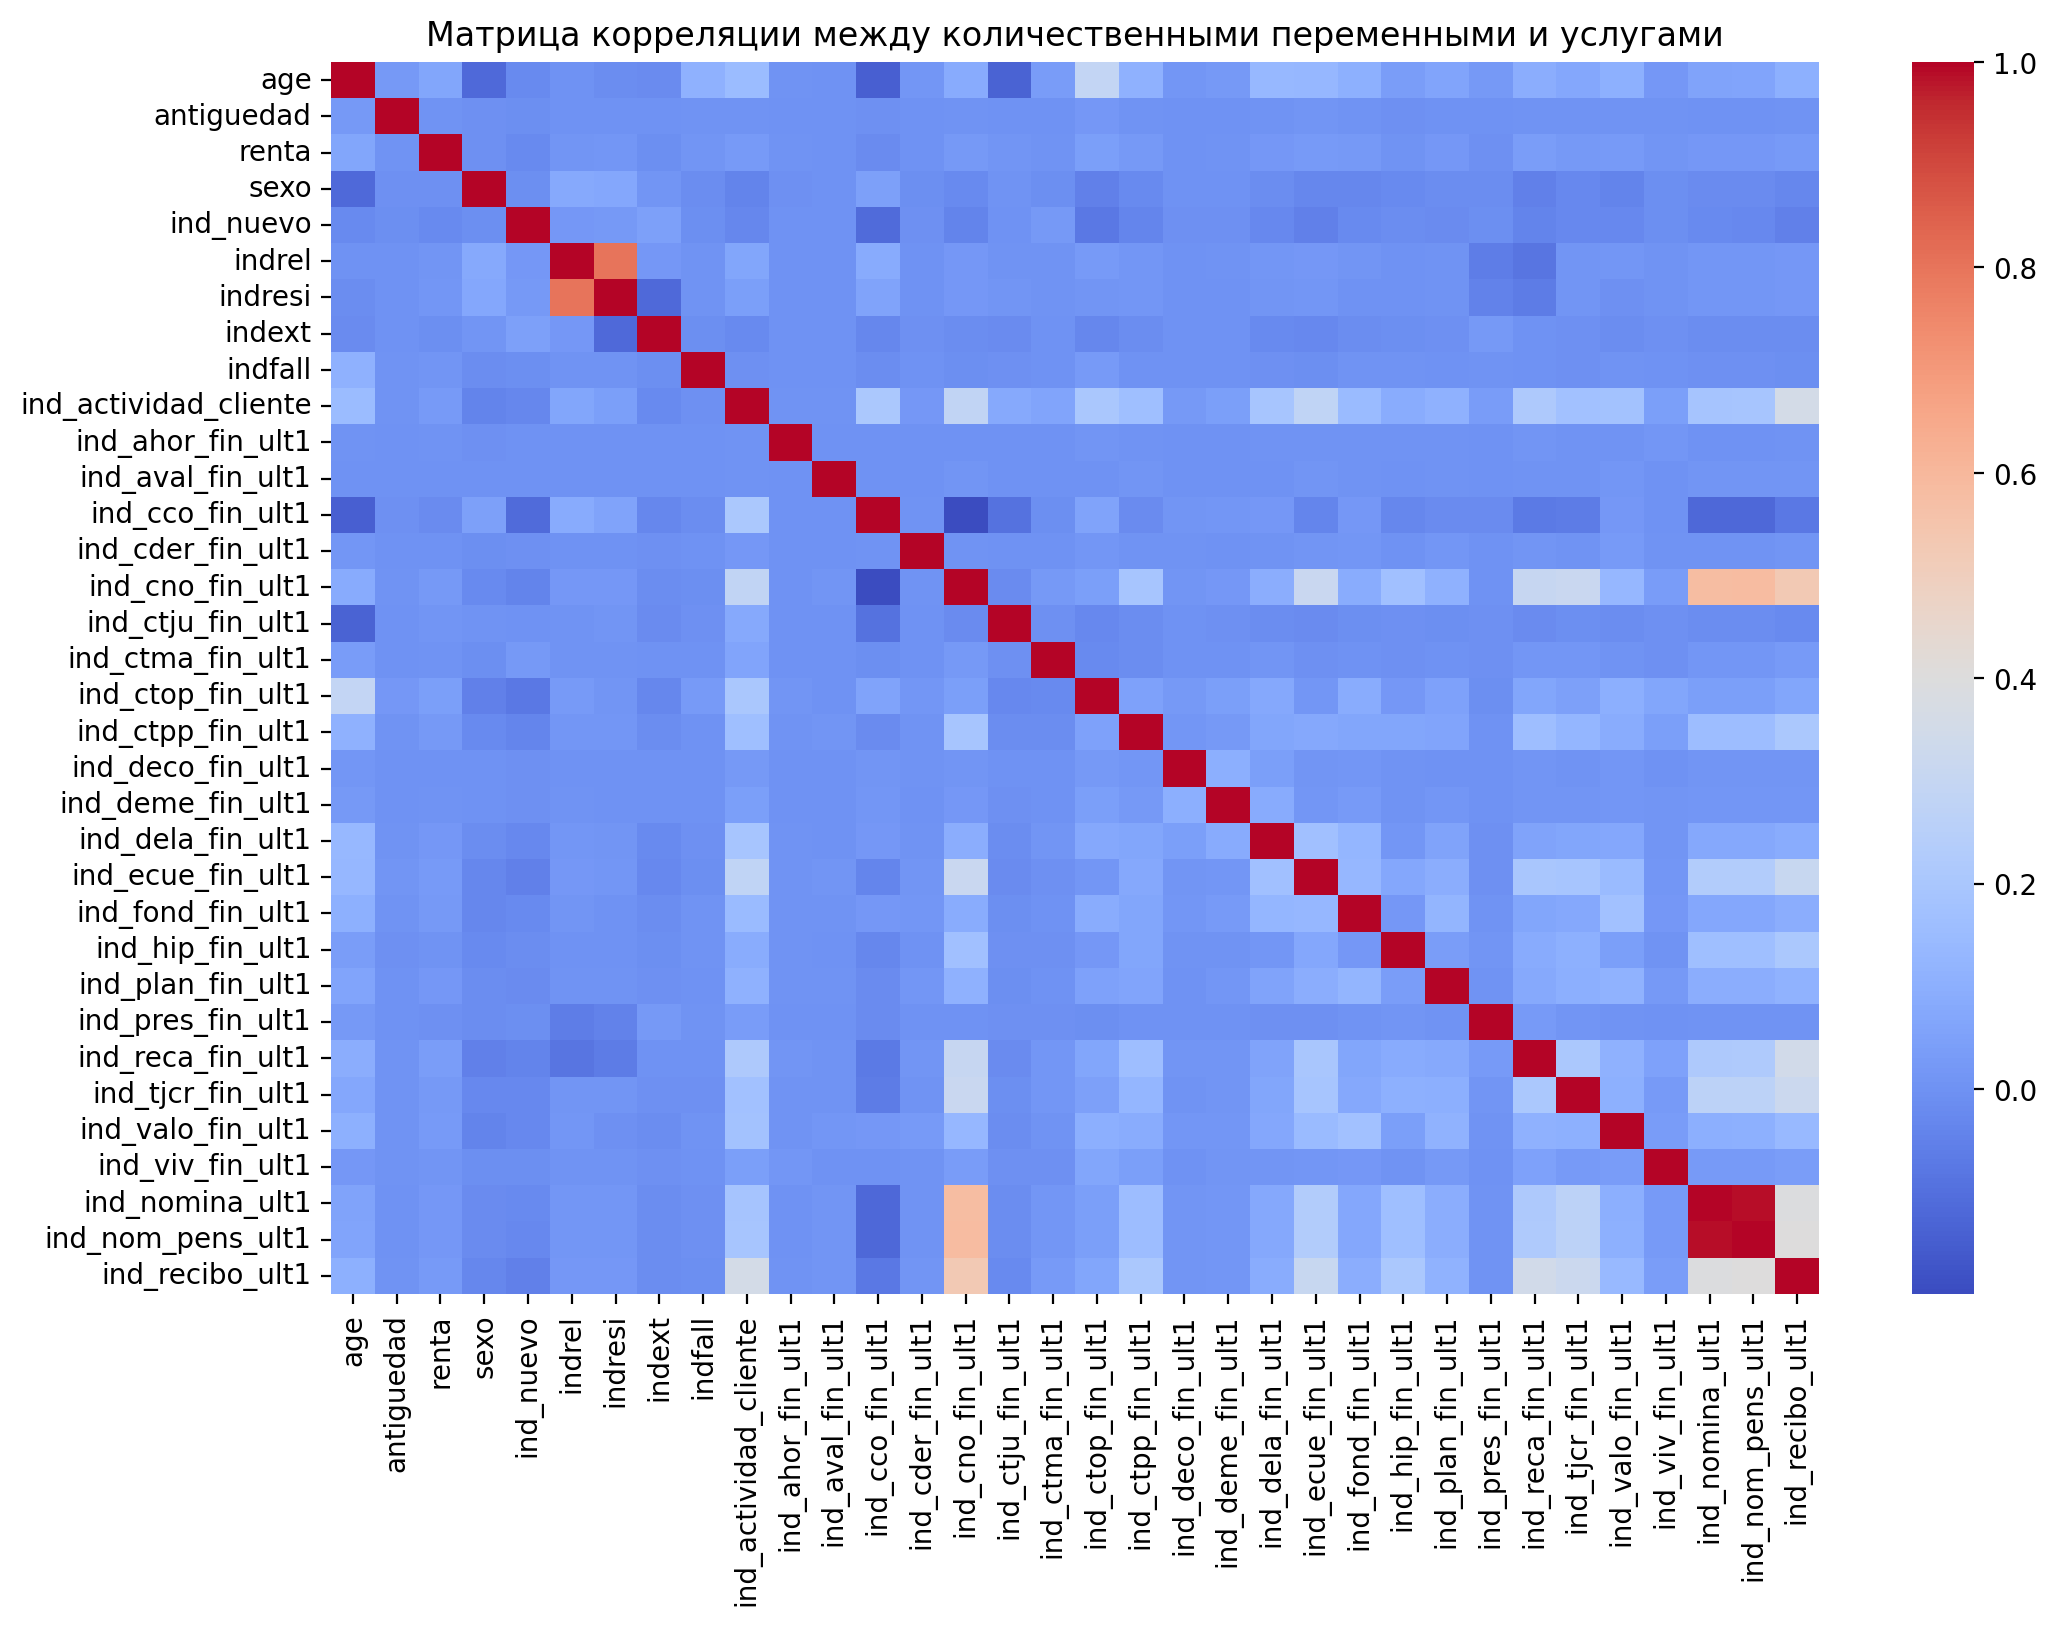

In [89]:
# Визуализируем корреляцию между признаками.
# Для этого предварительно аггрегируем данные (так как работаем с панельными данными)
data_numeric_only = data.groupby(['ncodpers'])[numeric_columns + boolean_columns].mean()

for col in data_numeric_only:
    data_numeric_only[col] = data_numeric_only[col].astype(int)

correlation_matrix = data_numeric_only.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    cbar=True,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns
)
plt.title("Матрица корреляции между количественными переменными и услугами")
plt.show()

Услуга «Текущие счета» ```ind_cco_fin_ult1``` имеет высокую положительную корреляцию с  услугами «Аккаунт для выплаты зарплаты» ```ind_nomina_ult1```, «Аккаунт для пенсионных обязательств» ```ind_nom_pens_ult1``` и «Дебетовый аккаунт» ```ind_recibo_ult1``` и обратную корреляцию с услугой «Зарплатный проект» ```ind_nomina_ult1```. Занчит клиенты, имеющие текущий счет, с большей вероятностью пользуются и другими банковскими услугами, такими как дебетовые карты и зарплатные проекты.

Также «Аккаунт для выплаты зарплаты» имеет высокую негативную корреляцию с «Аккаунт для пенсионных обязательств» ```ind_nom_pens_ult1```. Это может означать, что клиенты, которые выбирают зарплатный проект, менее склонны открывать стандартный текущий счет в банке.

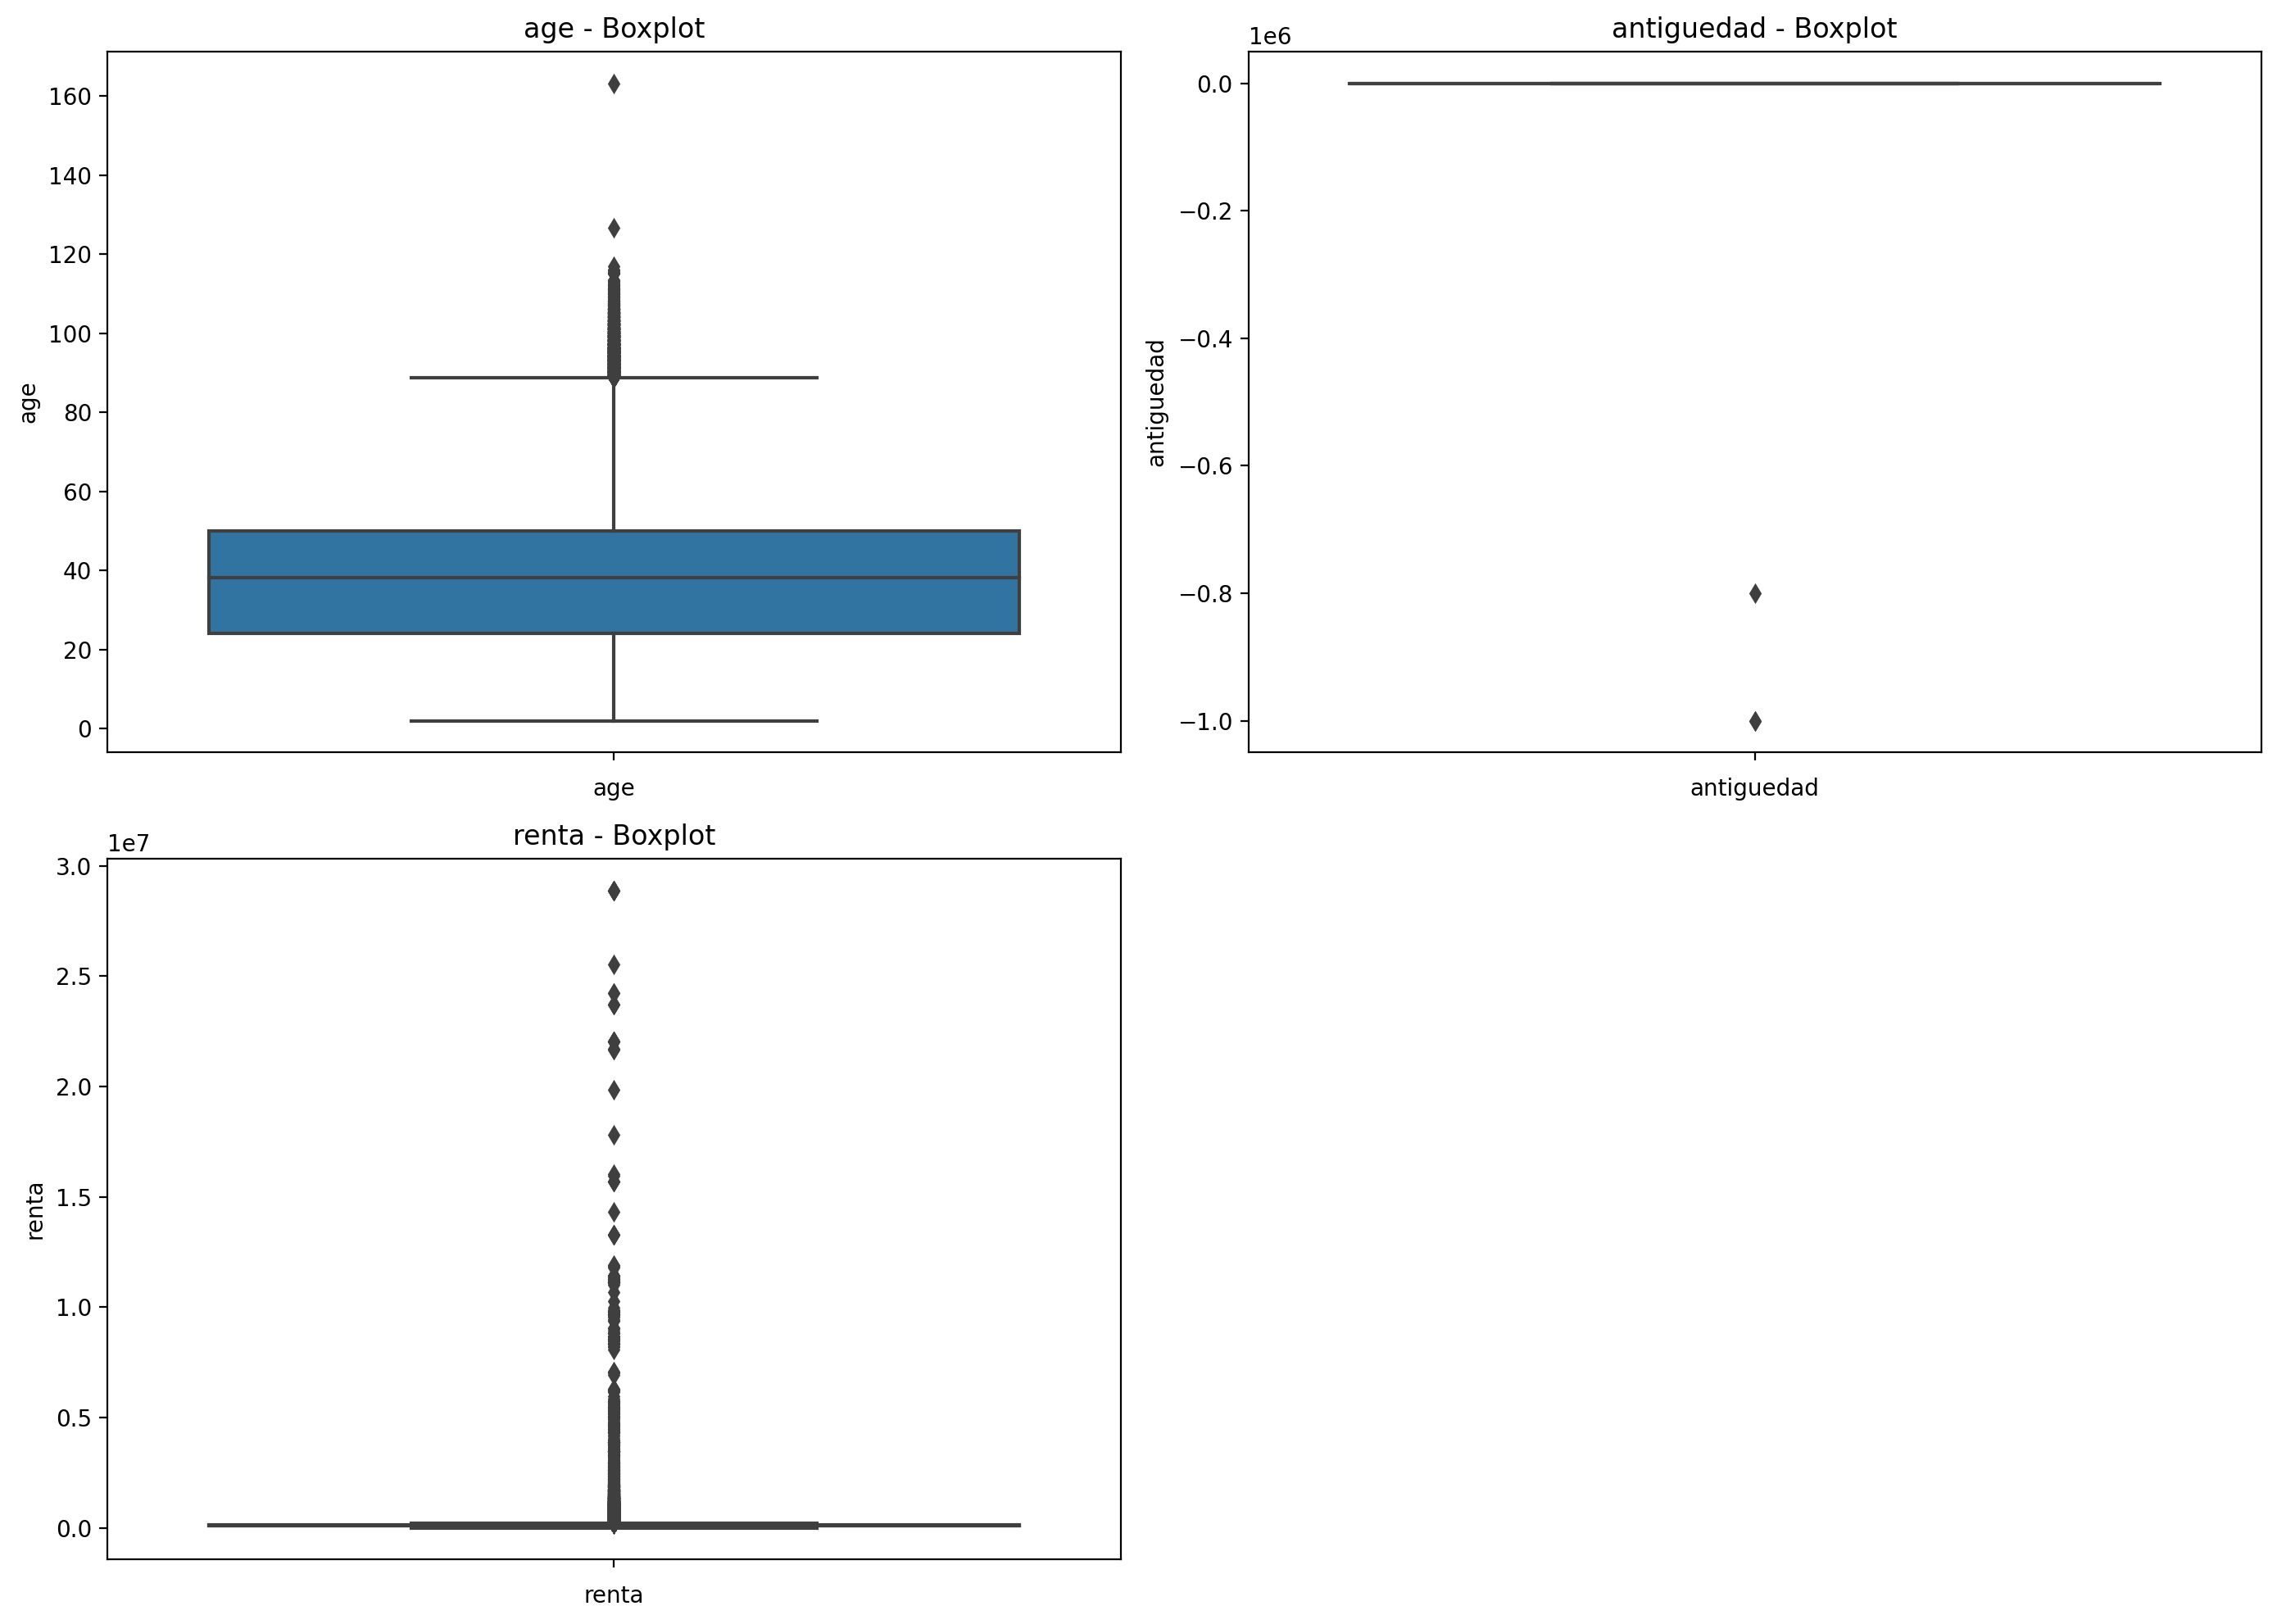

In [90]:
# Проверим количественные данные на выбросы, визуализируя их распределение как ящик с усами
aggregated_data = data.groupby('ncodpers')[numeric_columns].mean()
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=aggregated_data[col])
    plt.title(f'{col} - Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

В данных присутствуют выбросы

In [91]:
# Исключим выбросы
def remove_outliers(df, numeric_columns):
    df_cleaned = df.copy()
    
    for col in numeric_columns:
        threshold = 1
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_cleaned = df_cleaned[(df[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

data = remove_outliers(data, numeric_columns)

/var/folders/jg/38zlc6616vl3gdy84xc0lx4w0000gn/T/ipykernel_11974/548465252.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
/var/folders/jg/38zlc6616vl3gdy84xc0lx4w0000gn/T/ipykernel_11974/548465252.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]


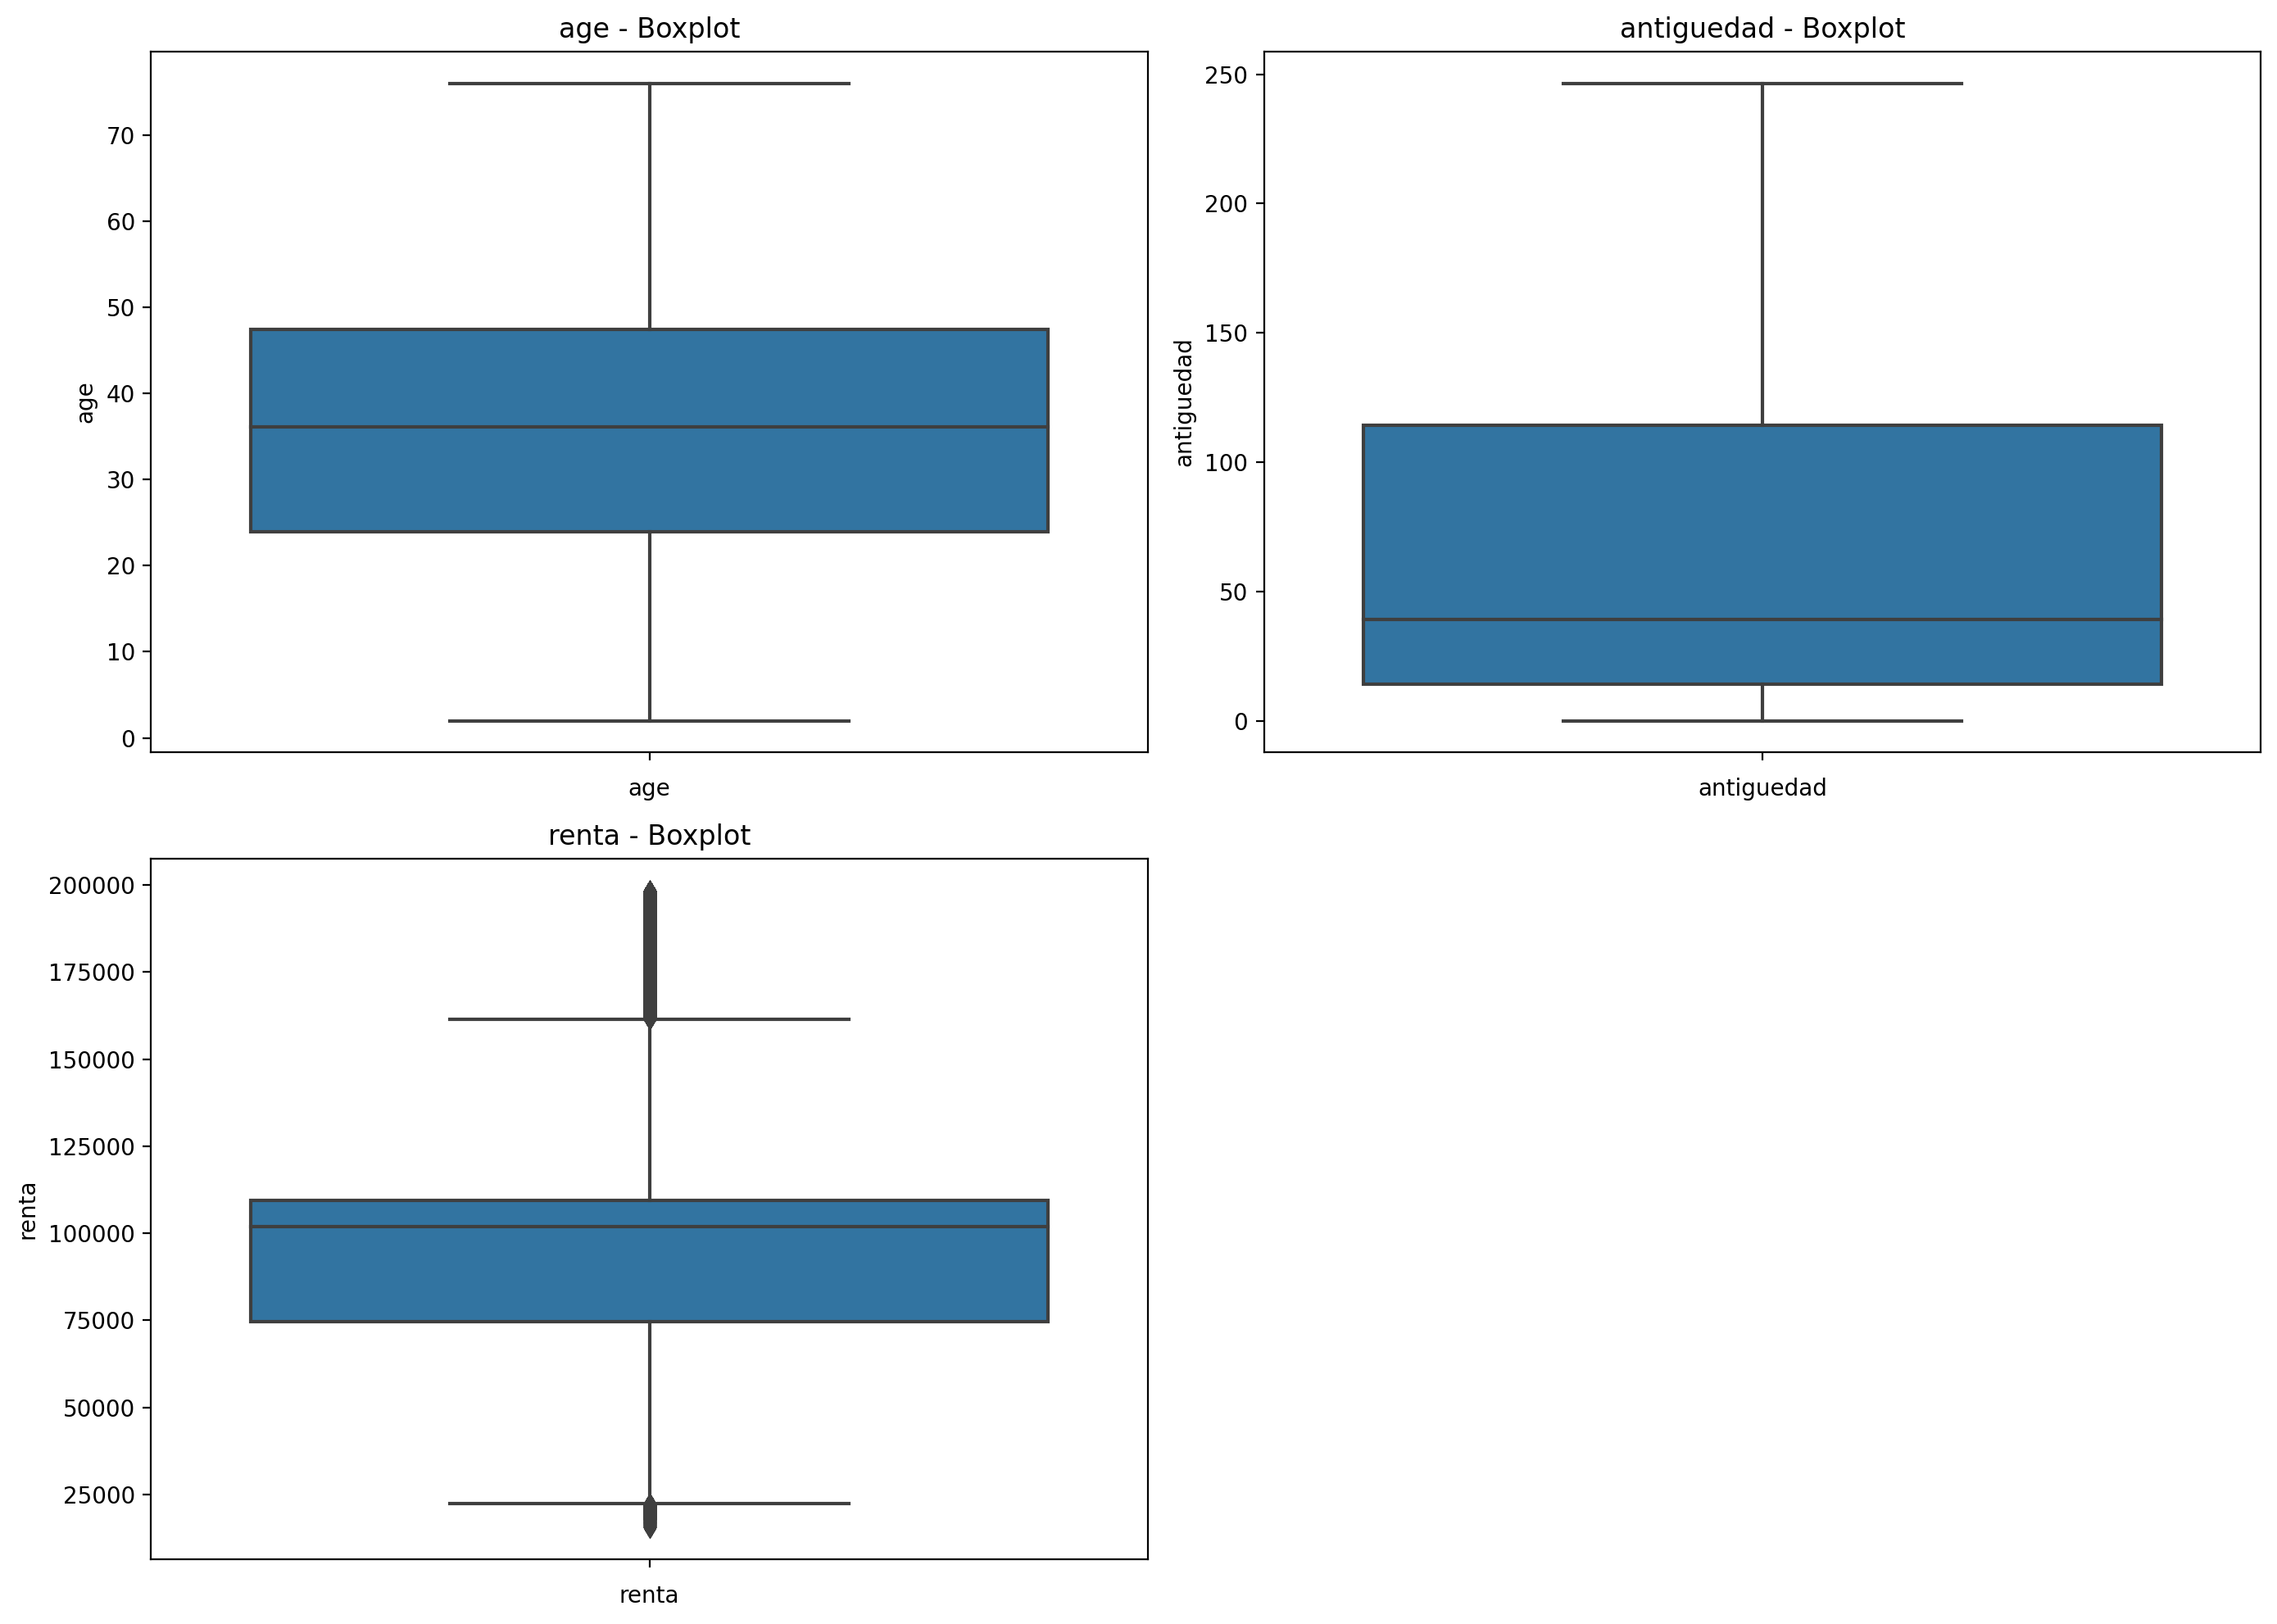

In [92]:
# Построим те же графики после исключения выбросов
aggregated_data = data.groupby('ncodpers')[numeric_columns].mean()
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=aggregated_data[col])
    plt.title(f'{col} - Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Данные стали более репрезентативными

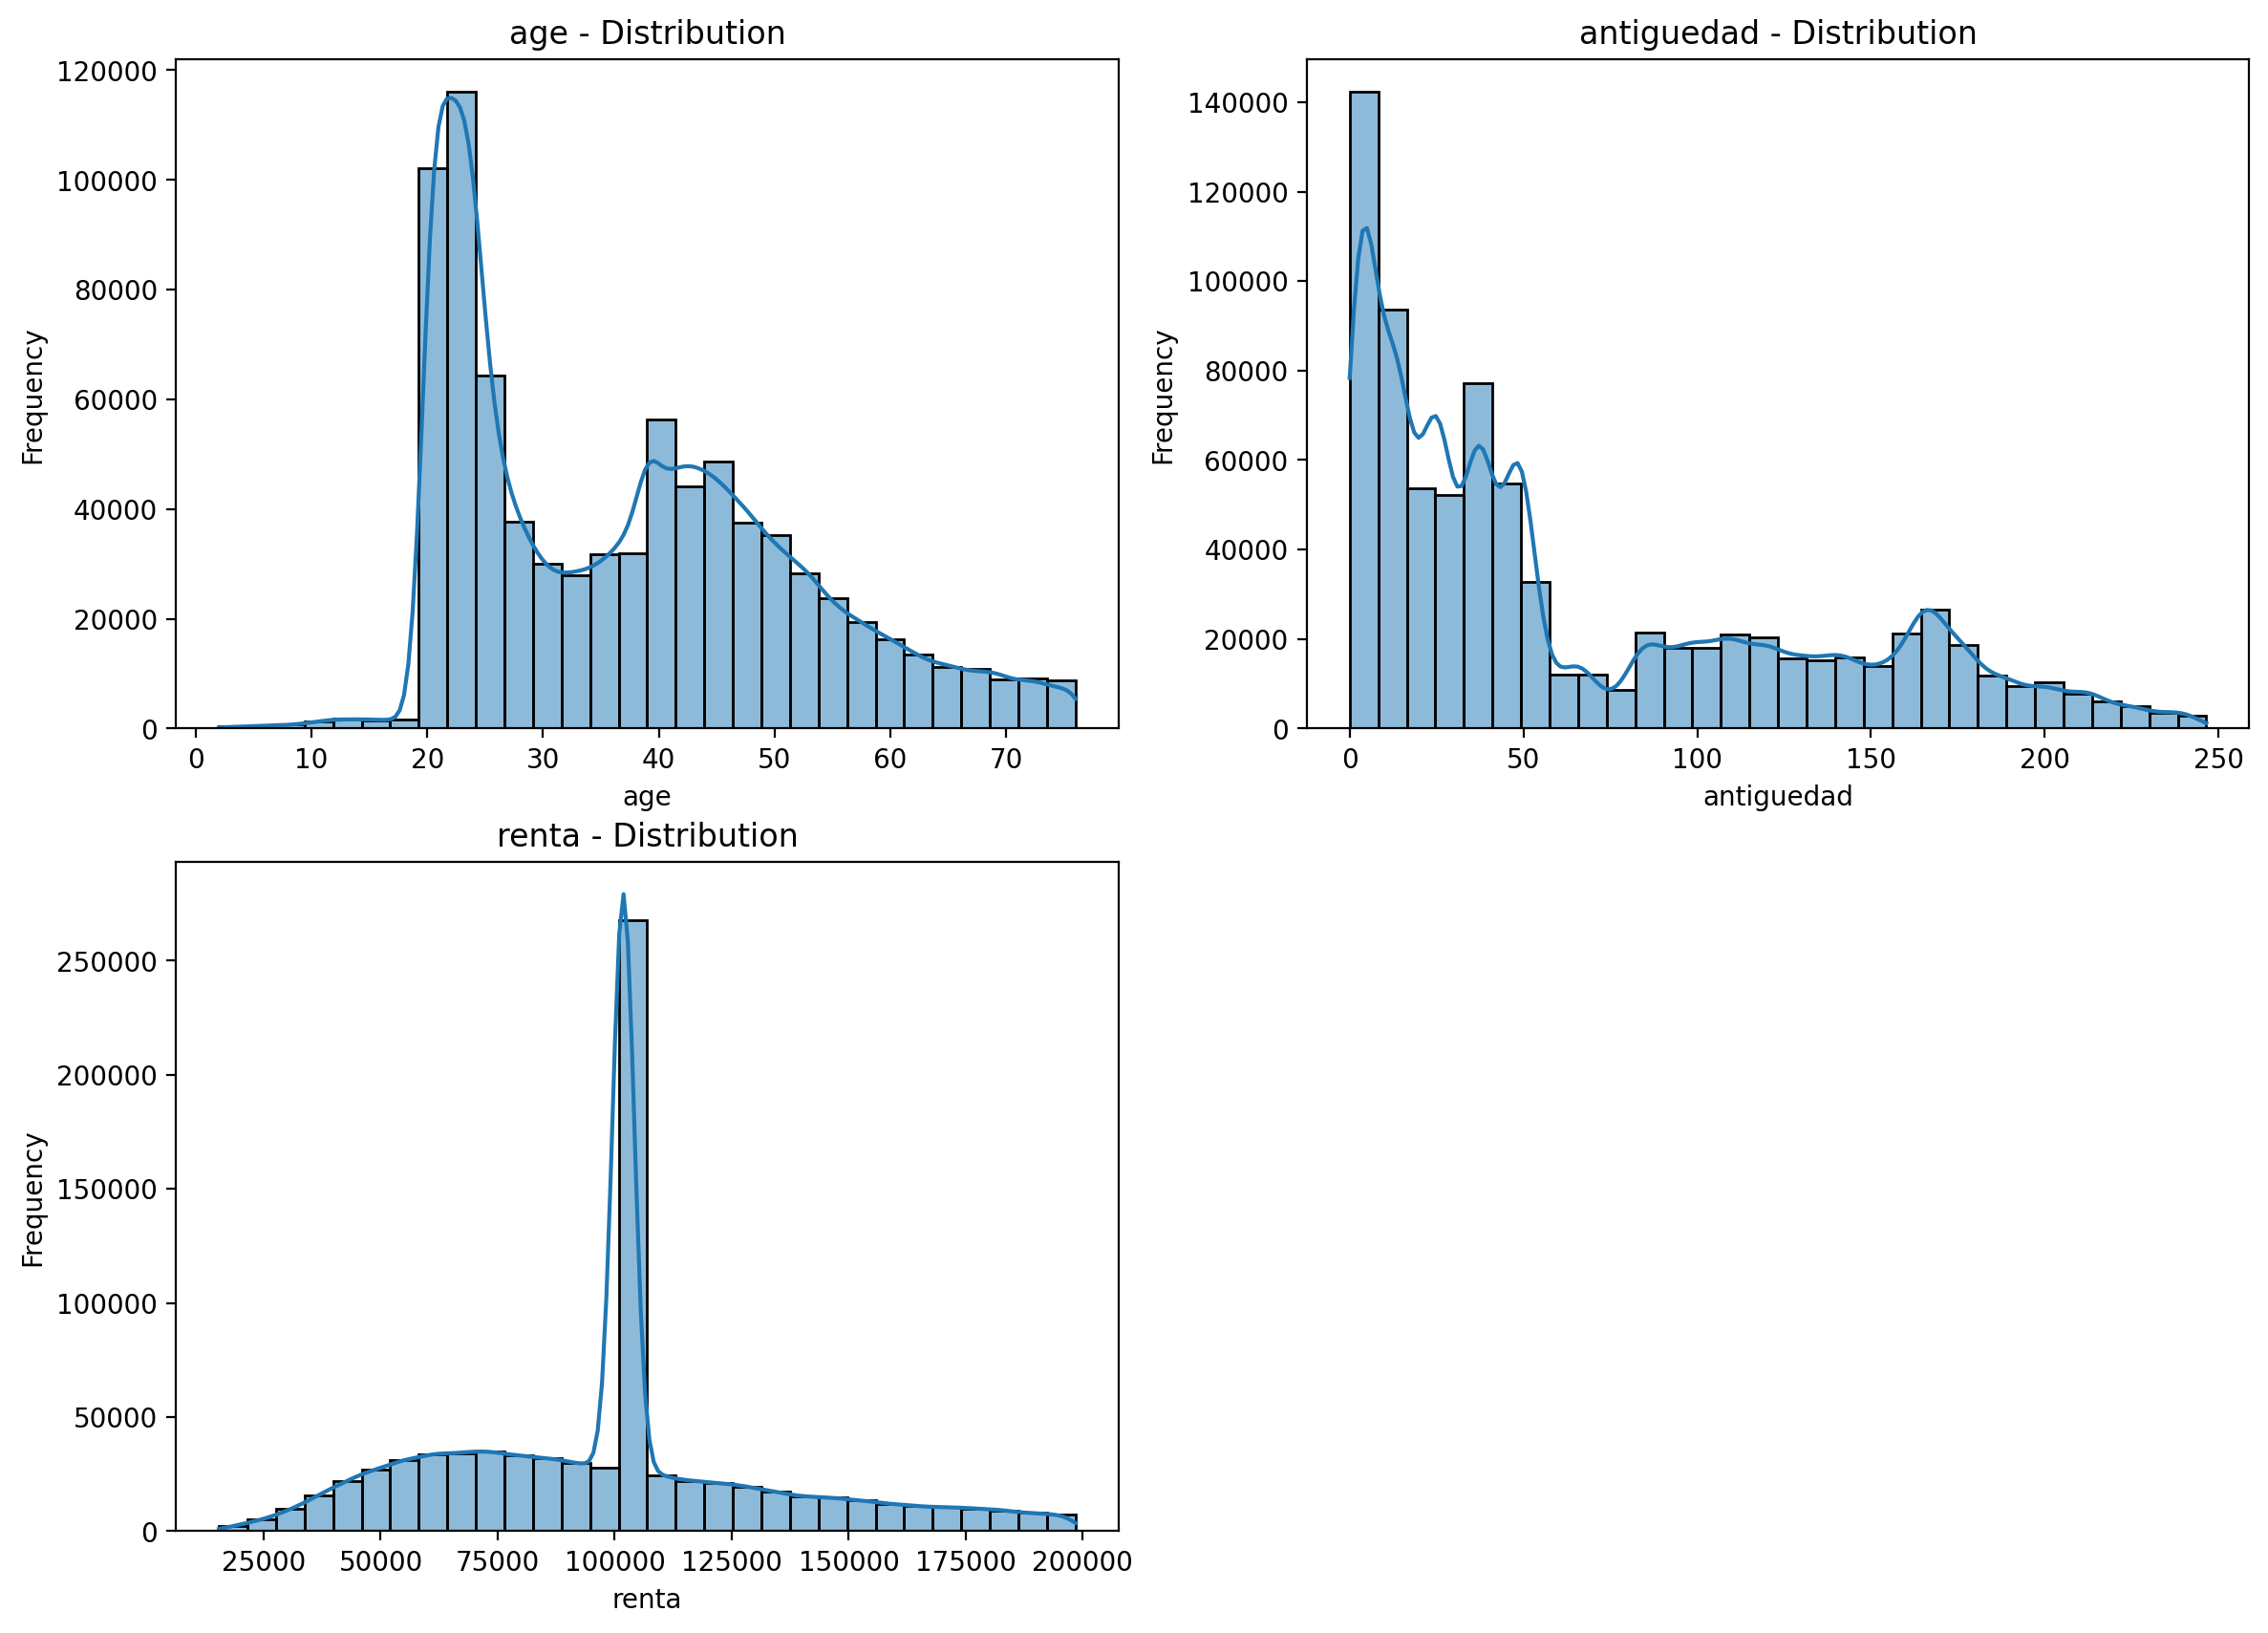

In [93]:
# Визуализируем распределение количественных переменных
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(aggregated_data[col], kde=True, bins=30)  # You can adjust 'bins' as necessary
    plt.title(f'{col} - Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

После того как данные были очищены от выбросов, мы получили репрезентативные гистограммы для количественных переменных.

Можно выделить две возрастные категории 20-25 лет и 40-50, на них приходится наибольшее количество клиентов.

Значительная часть клиентов имеют стаж от 0 до 50 месяцев.

Распределение доходов сосредоточено в диапазоне (50 000 – 150 000) с пиком около 100000 (это медианный доход).

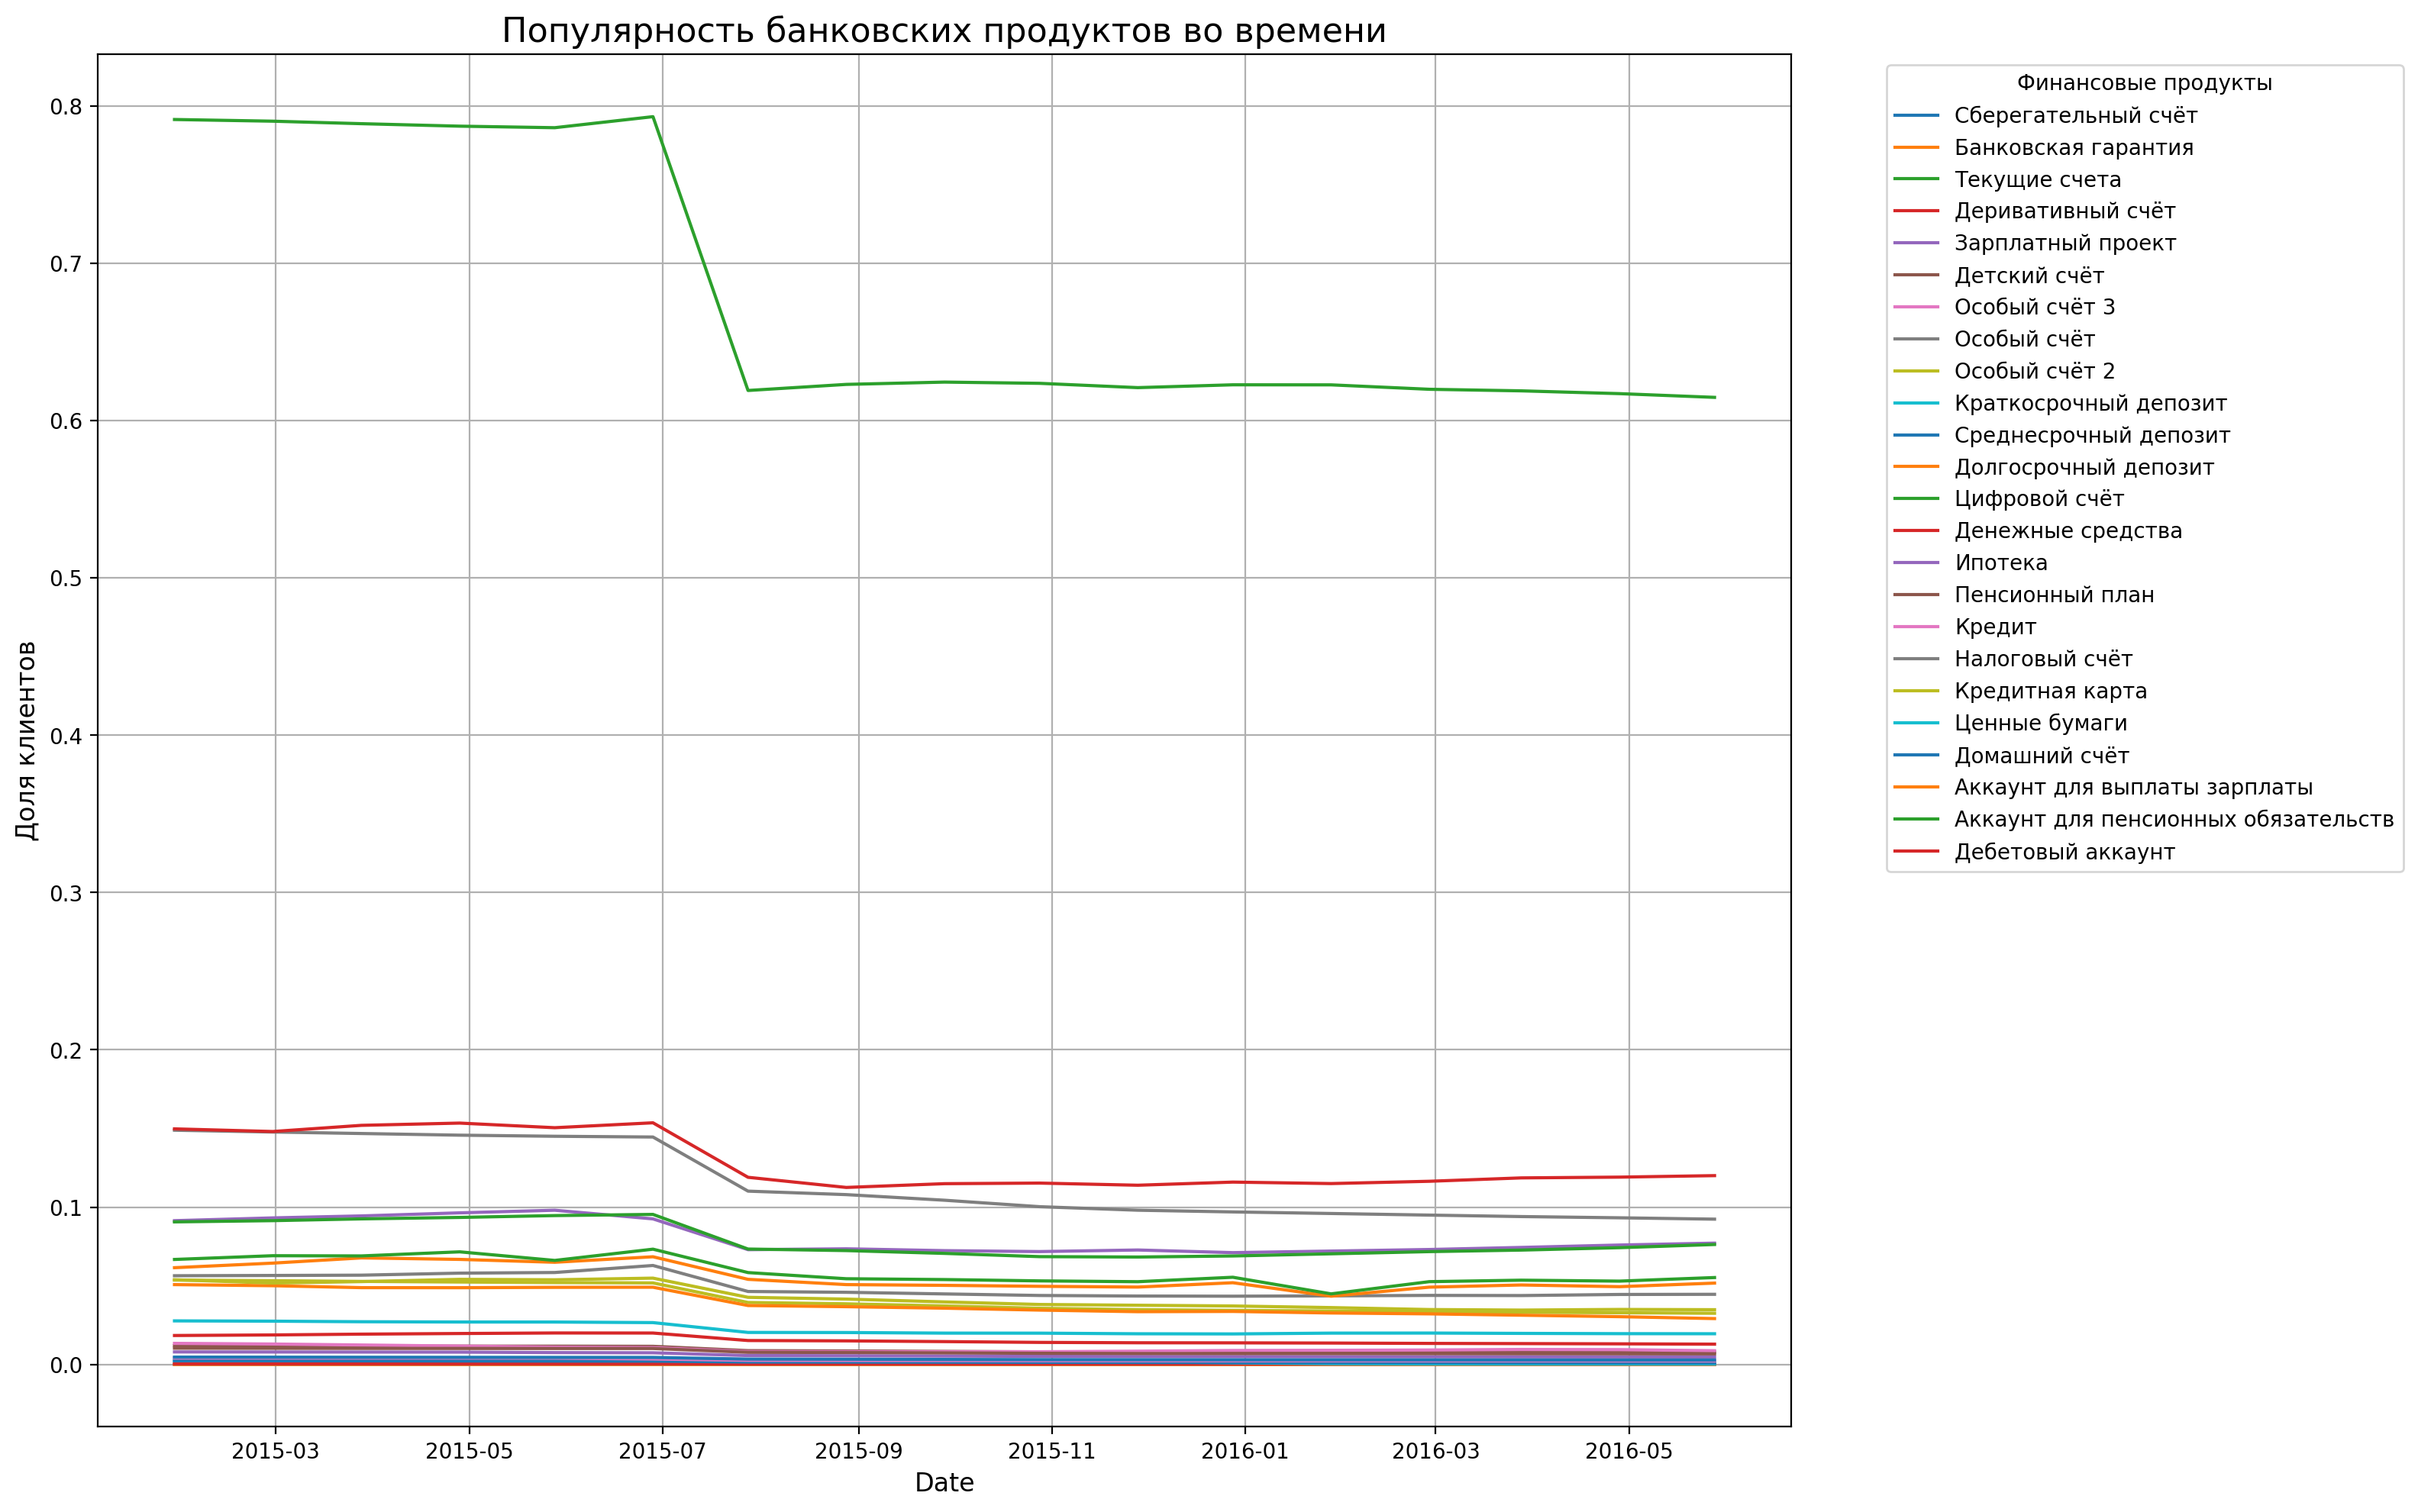

In [94]:
# Посмотрим как менялась доля использования банковских продуктов во времени
time_trends = data.groupby('fecha_dato')[target_columns].mean()

plt.figure(figsize=(16, 10))

for col in target_columns:
    plt.plot(time_trends.index, time_trends[col], label=column_names.get(col, col))

plt.title("Популярность банковских продуктов во времени", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Доля клиентов", fontsize=12)
plt.legend(title="Финансовые продукты", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Можно увидеть, что в июле 2015 года было уменьшение доли всех продуктов

Таким образом мы проанализировали данные, исправили типы и устранили в них пропуски. Проаназировали, какие банковские продукты пользовалиdataсь спросом за время наблюдений, рассмотрели корреляцию между признаками. Выявили и устранили выбросы в данных и визуализировали распределения колличественных характеристик.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>

Код демонстрирует комплексный подход к анализу данных. Хорошая визуализация и понятные выводы, молодец!
</div>


In [95]:
# Сохраним данные локально
data.to_parquet("data_transformed.parquet")

# Обучение моделей

Сначала разделим данные на тренировочные и тестовые. Затем попробуем несколько моделей, подходящих для решения задачи классификации по многим меткам.

В качестве метрик будем использовать Accuracy, Precision, Recall, они хорошо подходят для нашей задачи, так как отражают качество бинарных предсказаний. Для оценки общего качества модели и сравнения разных моделей между собой мы будем ориентироваться на взвешенный F1-Score. Такой подход позволит учесть диcбаланс классов.

In [97]:
data = pd.read_parquet("data_transformed.parquet")

In [111]:
interactions = data.sample(frac=0.01, random_state=42)

In [112]:
product_cols = [col for col in data.columns if col.endswith("_ult1")]

categorical_columns = [
    'ind_empleado', 'pais_residencia', 'indrel_1mes', 'tiprel_1mes', 
    'canal_entrada', 'indfall', 'segmento'
]

In [113]:
# Разобъем данные по времени
train_test_global_time_split_date = pd.Timestamp("2016-01-01")

train_test_global_time_split_idx = interactions["fecha_dato"] < train_test_global_time_split_date
interactions_train = interactions[train_test_global_time_split_idx]
interactions_test = interactions[~train_test_global_time_split_idx]

In [114]:
# Количество клиентов в train и test
clients_train = interactions_train["ncodpers"].drop_duplicates()
clients_test = interactions_test["ncodpers"].drop_duplicates()

print('Количество клиентов в train:', len(clients_train))
print('Количество клиентов в test:', len(clients_test))

Количество клиентов в train: 72891
Количество клиентов в test: 38502


In [115]:
interactions_train.drop(columns=['fecha_dato', 'ncodpers', 'fecha_alta'], inplace=True)
interactions_test.drop(columns=['fecha_dato', 'ncodpers', 'fecha_alta'], inplace=True)

In [116]:
X_train = interactions_train.drop(columns=product_cols)
y_train = interactions_train[product_cols]

In [117]:
X_test = interactions_test.drop(columns=product_cols)
y_test = interactions_test[product_cols]

In [118]:
print(X_train.columns.to_list())

['ind_empleado', 'pais_residencia', 'sexo', 'age', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'cod_prov', 'ind_actividad_cliente', 'renta', 'segmento']


In [119]:
train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=categorical_columns
)

In [120]:
# Попробуем модель Catboost. Она работает с категориальными переменными из коробки 
# и хорошо подходит для нашей задачи
cb_model = CatBoostClassifier(
    learning_rate=0.1,
    iterations=100,
    loss_function='MultiLogloss',
    verbose=10,
    thread_count=-1,
    random_seed=42,
)

cb_model.fit(train_pool)

0:	learn: 0.6121133	total: 2.48s	remaining: 4m 5s
10:	learn: 0.2521017	total: 49.3s	remaining: 6m 39s
20:	learn: 0.1564074	total: 1m 28s	remaining: 5m 32s
30:	learn: 0.1240841	total: 2m 1s	remaining: 4m 30s
40:	learn: 0.1123668	total: 2m 29s	remaining: 3m 35s
50:	learn: 0.1064517	total: 2m 57s	remaining: 2m 50s
60:	learn: 0.1037146	total: 3m 24s	remaining: 2m 10s
70:	learn: 0.1025526	total: 3m 52s	remaining: 1m 34s
80:	learn: 0.1018530	total: 4m 17s	remaining: 1m
90:	learn: 0.1012595	total: 4m 45s	remaining: 28.3s
99:	learn: 0.1007846	total: 5m 13s	remaining: 0us


In [121]:
# Посчитаем метрики на тестовой выборке
X_test = interactions_test.drop(columns=product_cols)
y_test = interactions_test[product_cols]

test_pool = Pool(
    data=X_test,
    label=y_test,
    cat_features=categorical_columns
)

In [122]:
preds = cb_model.predict_proba(test_pool)
predicted_labels = (preds > 0.5).astype(int)
predicted_df = pd.DataFrame(predicted_labels, columns=product_cols)

In [123]:
accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score (Weighted): {f1}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")

Accuracy: 0.5604731018695155
F1-Score (Weighted): 0.46179476239811124
Precision (Weighted): 0.6016749857869359
Recall (Weighted): 0.4828787458928783


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
metrics = {
    "accuracy": accuracy,
    "f1": f1,
    "precision": precision,
    "recall": recall
}

In [125]:
os.makedirs('artifacts', exist_ok=True)

In [126]:
cb_model.save_model('artifacts/catboost_model.bin')

In [127]:
signature = infer_signature(X_train[:10])

In [128]:
REGISTRY_MODEL_NAME = 'catboost_model'

if mlflow.get_experiment_by_name(EXPERIMENT_NAME):
    experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
else:
    experiment_id = mlflow.create_experiment(name=EXPERIMENT_NAME)

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    mlflow.log_metrics(metrics)

    model_info = mlflow.sklearn.log_model( 
        sk_model=cb_model,
        artifact_path="artifacts",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        await_registration_for=60,
    )

Registered model 'catboost_model' already exists. Creating a new version of this model...
2024/12/13 01:32:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 60 seconds for model version to finish creation. Model name: catboost_model, version 5


🏃 View run eda_model at: http://127.0.0.1:5000/#/experiments/1/runs/8ba3d4b6775d48938541f887bbd88476
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Created version '5' of model 'catboost_model'.


In [334]:
# Попробуем модель LGBMClassifier
# Для этого предварительно обработаем категориальные переменные c помощью трансформера LabelEncoder

In [132]:
# Посмотрим сколько уникальных классов у категориальных переменных
X_train[categorical_columns].nunique()

ind_empleado         5
pais_residencia     61
indrel_1mes          4
tiprel_1mes          5
canal_entrada      137
indfall              1
segmento             4
dtype: int64

In [230]:
X_train_t = X_train.copy()
X_test_t = X_test.copy()

label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()    
    le.fit(interactions[col])
    
    X_train_t[col] = le.transform(X_train_t[col])
    X_test_t[col] = le.transform(X_test_t[col])
    
    label_encoders[col] = le

In [231]:
X_train_t.head(3)

,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,cod_prov,ind_actividad_cliente,renta,segmento
5993509,3,22,False,26.0,False,12.0,True,1,1,False,False,132,0,3.0,True,21748.59,2
4167029,3,22,False,50.0,False,140.0,True,1,1,False,False,23,0,36.0,False,101850.00,1
6807239,3,22,False,75.0,False,167.0,True,1,0,False,False,6,0,31.0,False,101850.00,1


In [317]:
row_weights = 1 / y_train.sum(axis=1).replace(0, np.nan)
row_weights.fillna(row_weights.mean(), inplace=True)
normalized_weights = row_weights / row_weights.sum()

In [327]:
# построим модель LGBMClassifier
base_model = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    force_row_wise=True,
)

multi_label_model = MultiOutputClassifier(base_model)
multi_label_model.fit(X_train_t, y_train)

[LightGBM] [Info] Number of positive: 6, number of negative: 76533
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 76539, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1, number of negative: 76538
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 76539, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

MultiOutputClassifier(estimator=LGBMClassifier(class_weight='balanced',
                                               force_row_wise=True,
                                               objective='binary',
                                               random_state=42))

In [328]:
preds_lgb = multi_label_model.predict_proba(X_test_t)
predicted_labels_lgb = np.array([(x[:, 0] > 0.5).astype(int) for x in preds_lgb]).T

In [329]:
accuracy = accuracy_score(y_test, predicted_labels_lgb)
f1 = f1_score(y_test, predicted_labels_lgb, average='weighted')
precision = precision_score(y_test, predicted_labels_lgb, average='weighted')
recall = recall_score(y_test, predicted_labels_lgb, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score (Weighted): {f1}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")

Accuracy: 0.0
F1-Score (Weighted): 0.15441620350839588
Precision (Weighted): 0.1818681414678549
Recall (Weighted): 0.184850164284866


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [330]:
# Попробуем обучить несколько моделей LGBMClassifier на предсказание каждого из таргетных признаков
models = {}
for label in y_train.columns:
    models[label] = LGBMClassifier(
        boosting_type='gbdt',
        objective='binary',
        learning_rate=0.1,
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
    )
    models[label].fit(X_train_t, y_train[label])

[LightGBM] [Info] Number of positive: 6, number of negative: 76533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 76539, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1, number of negative: 76538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the ove

In [331]:
preds_multi_lgbm = {}
for label in y_train.columns:
    preds_multi_lgbm[label] = models[label].predict(X_test_t)

predicted_labels_multi_lgbm = pd.DataFrame(preds_multi_lgbm)

In [333]:
accuracy = accuracy_score(y_test, predicted_labels_multi_lgbm)
f1 = f1_score(y_test, predicted_labels_multi_lgbm, average='weighted')
precision = precision_score(y_test, predicted_labels_multi_lgbm, average='weighted')
recall = recall_score(y_test, predicted_labels_multi_lgbm, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score (Weighted): {f1}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")

Accuracy: 0.40852092076815466
F1-Score (Weighted): 0.5651979150892043
Precision (Weighted): 0.5177235560537383
Recall (Weighted): 0.815149835715134


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Так мы получили значительно лучшие результаты, чем с помощью одной модели.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Для LGBM и логистической регрессии не выполнена адекватная обработка категориальных признаков:
В LGBM используется принудительное преобразование с помощью pd.to_numeric, что может привести к потере информации.
Советую использовать OneHotEncoder или LabelEncoder для логистической регрессии. Для LGBM предпочтительно использовать LabelEncoder, чтобы сохранить числовое представление категорий.
</div>



<font color='blue'>Добавил преобразование категориальных признаков через LabelEncoder. Поменял методологию обучения модели</font>

Модель LGBMClassifier проставила большинству классов 1, отсюда высокий Recall и низкий Accuracy

In [336]:
metrics_lgb = {
    "accuracy": accuracy,
    "f1": f1,
    "precision": precision,
    "recall": recall
}

In [337]:
REGISTRY_MODEL_NAME = 'lgbm_model'

if mlflow.get_experiment_by_name(EXPERIMENT_NAME):
    experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
else:
    experiment_id = mlflow.create_experiment(name=EXPERIMENT_NAME)

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    mlflow.log_metrics(metrics_lgb)

    model_info = mlflow.sklearn.log_model( 
        sk_model=multi_label_model,
        artifact_path="artifacts",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        await_registration_for=60,
    )

Registered model 'lgbm_model' already exists. Creating a new version of this model...
2024/12/13 03:34:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 60 seconds for model version to finish creation. Model name: lgbm_model, version 3


🏃 View run eda_model at: http://127.0.0.1:5000/#/experiments/1/runs/ff73b86e7442405481c378c67c2fc5a5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Created version '3' of model 'lgbm_model'.


In [277]:
# Попробуем обычную логистическую регрессию для случая многофакторной классификации.
base_model = LogisticRegression(
    solver='liblinear',
    random_state=42,
    class_weight='balanced'
)

lr_model = MultiOutputClassifier(base_model)
lr_model.fit(X_train_t.drop(columns=['cod_prov'], axis=1), y_train)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   random_state=42,
                                                   solver='liblinear'))

In [280]:
preds_lr = lr_model.predict_proba(X_test_t.drop(columns=['cod_prov'], axis=1))

predicted_labels_lr = np.array([(x[:, 1] > 0.5).astype(int) for x in preds_lr])
predicted_labels_lr = np.array(predicted_labels_lr).reshape(y_test.shape)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
В коде дважды использован multi_label_model.predict_proba. Для логистической регрессии это должен быть вызов lr_model.predict_proba.
</div>


<font color='blue'>Поправил</font>

In [281]:
accuracy = accuracy_score(y_test, predicted_labels_lr)
f1 = f1_score(y_test, predicted_labels_lr, average='weighted')
precision = precision_score(y_test, predicted_labels_lr, average='weighted')
recall = recall_score(y_test, predicted_labels_lr, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score (Weighted): {f1}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")

Accuracy: 0.02009411166221544
F1-Score (Weighted): 0.21120312439164354
Precision (Weighted): 0.3321029826577895
Recall (Weighted): 0.2282174102371244


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Лучше, чем модель LGBMClassifier и хуже, чем Catboost

In [283]:
metrics_lr = {
    "accuracy": accuracy,
    "f1": f1,
    "precision": precision,
    "recall": recall
}

In [284]:
REGISTRY_MODEL_NAME = 'linear_regression_model'

if mlflow.get_experiment_by_name(EXPERIMENT_NAME):
    experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
else:
    experiment_id = mlflow.create_experiment(name=EXPERIMENT_NAME)

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    mlflow.log_metrics(metrics_lr)

    model_info = mlflow.sklearn.log_model( 
        sk_model=lr_model,
        artifact_path="artifacts",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        await_registration_for=60,
    )

Registered model 'linear_regression_model' already exists. Creating a new version of this model...
2024/12/13 02:58:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 60 seconds for model version to finish creation. Model name: linear_regression_model, version 4


🏃 View run eda_model at: http://127.0.0.1:5000/#/experiments/1/runs/c78f033f56724957b5c1e8379be2109e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Created version '4' of model 'linear_regression_model'.


На подготовленных данных мы обучили несколько моделей и сохранили артфефакты в MLFlow. Лучше всех показала себя Catboost, с ней мы будем работать дальше.

# Подбор гиперпараметров

In [168]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 5],
    'iterations': [100],
}

In [173]:
grid_search = GridSearchCV(CatBoostClassifier(
    cat_features=['ind_empleado', 'pais_residencia', 'tiprel_1mes', 'canal_entrada', 'indfall', 'segmento'],
    loss_function='MultiLogloss',
    verbose=10,
    thread_count=-1,
    random_seed=42
), param_grid, cv=3, scoring='f1_weighted', verbose=3)

In [174]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0:	learn: 0.6847023	total: 1.22s	remaining: 2m 1s
10:	learn: 0.6081431	total: 12.5s	remaining: 1m 41s
20:	learn: 0.5446957	total: 20.4s	remaining: 1m 16s
30:	learn: 0.4909041	total: 31s	remaining: 1m 9s
40:	learn: 0.4453190	total: 42.4s	remaining: 1m 1s
50:	learn: 0.4063435	total: 52.2s	remaining: 50.1s
60:	learn: 0.3724911	total: 1m 2s	remaining: 40s
70:	learn: 0.3433379	total: 1m 10s	remaining: 28.8s
80:	learn: 0.3177529	total: 1m 19s	remaining: 18.7s
90:	learn: 0.2952374	total: 1m 32s	remaining: 9.18s
99:	learn: 0.2768971	total: 1m 44s	remaining: 0us
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=0.381 total time= 1.8min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=nan total time=   0.1s
0:	learn: 0.6846952	total: 1.5s	remaining: 2m 28s
10:	learn: 0.6080774	total: 14.7s	remaining: 1m 58s
20:	learn: 0.5445818	total: 25.4s	remaining: 1m 35s
30:	learn: 0.4910418	total: 37.2s	remaining: 1m 22s
40:	learn: 0.4455901	total: 47.7s	remaining: 1m 8s
50:	learn: 0.4065512	total: 1m 4s	remaining: 1m 1s
60:	learn: 0.3728189	total: 1m 18s	remaining: 50.3s
70:	learn: 0.3430729	total: 1m 39s	remaining: 40.6s
80:	learn: 0.3172616	total: 1m 51s	remaining: 26.3s
90:	learn: 0.2944764	total: 2m 4s	remaining: 12.3s
99:	learn: 0.2762826	total: 2m 16s	remaining: 0us
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=0.383 total time= 2.3min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6125092	total: 1.44s	remaining: 2m 22s
10:	learn: 0.2543530	total: 13.7s	remaining: 1m 51s
20:	learn: 0.1582249	total: 26.6s	remaining: 1m 40s
30:	learn: 0.1262523	total: 44.7s	remaining: 1m 39s
40:	learn: 0.1142714	total: 59.3s	remaining: 1m 25s
50:	learn: 0.1089424	total: 1m 16s	remaining: 1m 13s
60:	learn: 0.1065343	total: 1m 30s	remaining: 57.6s
70:	learn: 0.1051579	total: 1m 43s	remaining: 42.1s
80:	learn: 0.1041056	total: 1m 58s	remaining: 27.9s
90:	learn: 0.1033526	total: 2m 17s	remaining: 13.6s
99:	learn: 0.1025701	total: 2m 31s	remaining: 0us
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.458 total time= 2.5min
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=nan total time=   0.1s


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6124417	total: 1.39s	remaining: 2m 17s
10:	learn: 0.2541958	total: 13.2s	remaining: 1m 47s
20:	learn: 0.1576298	total: 26s	remaining: 1m 37s
30:	learn: 0.1257210	total: 38.9s	remaining: 1m 26s
40:	learn: 0.1144645	total: 55.5s	remaining: 1m 19s
50:	learn: 0.1085203	total: 1m 10s	remaining: 1m 7s
60:	learn: 0.1060240	total: 1m 28s	remaining: 56.8s
70:	learn: 0.1047996	total: 1m 49s	remaining: 44.7s
80:	learn: 0.1037059	total: 2m 10s	remaining: 30.7s
90:	learn: 0.1029713	total: 2m 34s	remaining: 15.3s
99:	learn: 0.1024836	total: 2m 54s	remaining: 0us
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.456 total time= 2.9min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6847170	total: 1.93s	remaining: 3m 11s
10:	learn: 0.6083212	total: 23s	remaining: 3m 6s
20:	learn: 0.5448948	total: 32.5s	remaining: 2m 2s
30:	learn: 0.4911422	total: 45.2s	remaining: 1m 40s
40:	learn: 0.4455894	total: 1m 1s	remaining: 1m 28s
50:	learn: 0.4066235	total: 1m 18s	remaining: 1m 15s
60:	learn: 0.3727827	total: 1m 34s	remaining: 1m
70:	learn: 0.3436447	total: 1m 45s	remaining: 43.3s
80:	learn: 0.3180618	total: 1m 57s	remaining: 27.5s
90:	learn: 0.2955508	total: 2m 15s	remaining: 13.4s
99:	learn: 0.2772395	total: 2m 31s	remaining: 0us
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=5, learning_rate=0.01;, score=0.381 total time= 2.5min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=5, learning_rate=0.01;, score=nan total time=   0.1s
0:	learn: 0.6847101	total: 1.71s	remaining: 2m 49s
10:	learn: 0.6082550	total: 20.4s	remaining: 2m 45s
20:	learn: 0.5447891	total: 32.8s	remaining: 2m 3s
30:	learn: 0.4912807	total: 52.4s	remaining: 1m 56s
40:	learn: 0.4458608	total: 1m 4s	remaining: 1m 32s
50:	learn: 0.4068240	total: 1m 17s	remaining: 1m 14s
60:	learn: 0.3731025	total: 1m 37s	remaining: 1m 2s
70:	learn: 0.3433826	total: 1m 53s	remaining: 46.3s
80:	learn: 0.3175796	total: 2m 13s	remaining: 31.2s
90:	learn: 0.2948227	total: 2m 36s	remaining: 15.5s
99:	learn: 0.2766559	total: 2m 52s	remaining: 0us
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=5, learning_rate=0.01;, score=0.383 total time= 2.9min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6126443	total: 1.86s	remaining: 3m 4s
10:	learn: 0.2547802	total: 16.5s	remaining: 2m 13s
20:	learn: 0.1586975	total: 40s	remaining: 2m 30s
30:	learn: 0.1270119	total: 1m 1s	remaining: 2m 17s
40:	learn: 0.1153088	total: 1m 25s	remaining: 2m 3s
50:	learn: 0.1097752	total: 1m 42s	remaining: 1m 38s
60:	learn: 0.1070015	total: 2m 6s	remaining: 1m 21s
70:	learn: 0.1052901	total: 2m 30s	remaining: 1m 1s
80:	learn: 0.1042425	total: 2m 50s	remaining: 39.9s
90:	learn: 0.1032810	total: 3m 13s	remaining: 19.2s
99:	learn: 0.1027662	total: 3m 29s	remaining: 0us
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=5, learning_rate=0.1;, score=0.457 total time= 3.5min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=5, learning_rate=0.1;, score=nan total time=   0.1s
0:	learn: 0.6125783	total: 1.55s	remaining: 2m 33s
10:	learn: 0.2546342	total: 15.8s	remaining: 2m 7s
20:	learn: 0.1581293	total: 28.9s	remaining: 1m 48s
30:	learn: 0.1265113	total: 46s	remaining: 1m 42s
40:	learn: 0.1144588	total: 1m 5s	remaining: 1m 33s
50:	learn: 0.1092208	total: 1m 27s	remaining: 1m 23s
60:	learn: 0.1064758	total: 1m 47s	remaining: 1m 8s
70:	learn: 0.1050069	total: 2m 9s	remaining: 53s
80:	learn: 0.1041262	total: 2m 24s	remaining: 33.8s
90:	learn: 0.1035273	total: 2m 38s	remaining: 15.7s
99:	learn: 0.1029664	total: 2m 52s	remaining: 0us
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=5, learning_rate=0.1;, score=0.455 total time= 2.9min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6847027	total: 2.27s	remaining: 3m 44s
10:	learn: 0.6083378	total: 26.9s	remaining: 3m 37s
20:	learn: 0.5445442	total: 47.1s	remaining: 2m 57s
30:	learn: 0.4909424	total: 1m 6s	remaining: 2m 27s
40:	learn: 0.4451891	total: 1m 24s	remaining: 2m 2s
50:	learn: 0.4056303	total: 1m 46s	remaining: 1m 42s
60:	learn: 0.3716268	total: 2m 2s	remaining: 1m 18s
70:	learn: 0.3418367	total: 2m 20s	remaining: 57.3s
80:	learn: 0.3158387	total: 2m 37s	remaining: 37.1s
90:	learn: 0.2931371	total: 2m 57s	remaining: 17.6s
99:	learn: 0.2747624	total: 3m 14s	remaining: 0us
[CV 1/3] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=0.381 total time= 3.2min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV 2/3] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=nan total time=   0.1s
0:	learn: 0.6846962	total: 3.17s	remaining: 5m 13s
10:	learn: 0.6080052	total: 22.2s	remaining: 2m 59s
20:	learn: 0.5442627	total: 37.6s	remaining: 2m 21s
30:	learn: 0.4905178	total: 52.9s	remaining: 1m 57s
40:	learn: 0.4443230	total: 1m 12s	remaining: 1m 43s
50:	learn: 0.4048120	total: 1m 27s	remaining: 1m 24s
60:	learn: 0.3706275	total: 1m 44s	remaining: 1m 6s
70:	learn: 0.3411178	total: 2m	remaining: 49.2s
80:	learn: 0.3153946	total: 2m 20s	remaining: 32.9s
90:	learn: 0.2931458	total: 2m 39s	remaining: 15.7s
99:	learn: 0.2750440	total: 3m 1s	remaining: 0us
[CV 3/3] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=0.380 total time= 3.0min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6125111	total: 2.12s	remaining: 3m 29s
10:	learn: 0.2531010	total: 18.1s	remaining: 2m 26s
20:	learn: 0.1562468	total: 36s	remaining: 2m 15s
30:	learn: 0.1251030	total: 51.7s	remaining: 1m 55s
40:	learn: 0.1130180	total: 1m 14s	remaining: 1m 47s
50:	learn: 0.1066393	total: 1m 43s	remaining: 1m 39s
60:	learn: 0.1039595	total: 2m 5s	remaining: 1m 20s
70:	learn: 0.1028353	total: 2m 29s	remaining: 1m
80:	learn: 0.1019231	total: 2m 49s	remaining: 39.6s
90:	learn: 0.1013112	total: 3m 13s	remaining: 19.2s
99:	learn: 0.1009199	total: 3m 34s	remaining: 0us
[CV 1/3] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.464 total time= 3.6min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV 2/3] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=nan total time=   0.1s
0:	learn: 0.6124492	total: 2.41s	remaining: 3m 58s
10:	learn: 0.2529066	total: 20.8s	remaining: 2m 48s
20:	learn: 0.1567332	total: 39.5s	remaining: 2m 28s
30:	learn: 0.1252713	total: 57.1s	remaining: 2m 7s
40:	learn: 0.1127004	total: 1m 15s	remaining: 1m 49s
50:	learn: 0.1066758	total: 1m 35s	remaining: 1m 32s
60:	learn: 0.1041922	total: 1m 55s	remaining: 1m 13s
70:	learn: 0.1027739	total: 2m 15s	remaining: 55.4s
80:	learn: 0.1018293	total: 2m 34s	remaining: 36.2s
90:	learn: 0.1012318	total: 2m 54s	remaining: 17.3s
99:	learn: 0.1008206	total: 3m 12s	remaining: 0us
[CV 3/3] END depth=6, iterations=100, l2_leaf_reg=1, learning_rate=0.1;, score=0.466 total time= 3.2min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6847312	total: 2s	remaining: 3m 18s
10:	learn: 0.6086325	total: 19.1s	remaining: 2m 34s
20:	learn: 0.5449334	total: 34s	remaining: 2m 8s
30:	learn: 0.4913561	total: 48.9s	remaining: 1m 48s
40:	learn: 0.4456477	total: 1m 4s	remaining: 1m 32s
50:	learn: 0.4062304	total: 1m 22s	remaining: 1m 18s
60:	learn: 0.3719175	total: 1m 43s	remaining: 1m 6s
70:	learn: 0.3421834	total: 2m 3s	remaining: 50.5s
80:	learn: 0.3162007	total: 2m 30s	remaining: 35.2s
90:	learn: 0.2934699	total: 2m 52s	remaining: 17.1s
99:	learn: 0.2754888	total: 3m 9s	remaining: 0us
[CV 1/3] END depth=6, iterations=100, l2_leaf_reg=5, learning_rate=0.01;, score=0.381 total time= 3.2min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV 2/3] END depth=6, iterations=100, l2_leaf_reg=5, learning_rate=0.01;, score=nan total time=   0.1s
0:	learn: 0.6847249	total: 2.36s	remaining: 3m 53s
10:	learn: 0.6082279	total: 20.2s	remaining: 2m 43s
20:	learn: 0.5445556	total: 42.1s	remaining: 2m 38s
30:	learn: 0.4908798	total: 1m 2s	remaining: 2m 19s
40:	learn: 0.4447602	total: 1m 26s	remaining: 2m 4s
50:	learn: 0.4052878	total: 1m 43s	remaining: 1m 39s
60:	learn: 0.3711790	total: 2m 5s	remaining: 1m 20s
70:	learn: 0.3416114	total: 2m 22s	remaining: 58.1s
80:	learn: 0.3159573	total: 2m 36s	remaining: 36.7s
90:	learn: 0.2934581	total: 2m 56s	remaining: 17.5s
99:	learn: 0.2754274	total: 3m 14s	remaining: 0us
[CV 3/3] END depth=6, iterations=100, l2_leaf_reg=5, learning_rate=0.01;, score=0.380 total time= 3.3min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6127732	total: 4.16s	remaining: 6m 51s
10:	learn: 0.2538076	total: 28.1s	remaining: 3m 47s
20:	learn: 0.1569948	total: 57.6s	remaining: 3m 36s
30:	learn: 0.1264591	total: 1m 18s	remaining: 2m 55s
40:	learn: 0.1133971	total: 1m 37s	remaining: 2m 20s
50:	learn: 0.1075091	total: 2m 3s	remaining: 1m 58s
60:	learn: 0.1050038	total: 2m 24s	remaining: 1m 32s
70:	learn: 0.1037432	total: 2m 48s	remaining: 1m 8s
80:	learn: 0.1030521	total: 3m 10s	remaining: 44.6s
90:	learn: 0.1024477	total: 3m 35s	remaining: 21.3s
99:	learn: 0.1019477	total: 3m 53s	remaining: 0us
[CV 1/3] END depth=6, iterations=100, l2_leaf_reg=5, learning_rate=0.1;, score=0.459 total time= 3.9min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


[CV 2/3] END depth=6, iterations=100, l2_leaf_reg=5, learning_rate=0.1;, score=nan total time=   0.1s
0:	learn: 0.6127134	total: 1.97s	remaining: 3m 14s
10:	learn: 0.2536865	total: 17.9s	remaining: 2m 25s
20:	learn: 0.1565229	total: 35s	remaining: 2m 11s
30:	learn: 0.1253270	total: 50.2s	remaining: 1m 51s
40:	learn: 0.1138558	total: 1m 6s	remaining: 1m 35s
50:	learn: 0.1077707	total: 1m 25s	remaining: 1m 22s
60:	learn: 0.1048600	total: 1m 46s	remaining: 1m 8s
70:	learn: 0.1033469	total: 2m 6s	remaining: 51.8s
80:	learn: 0.1025054	total: 2m 42s	remaining: 38.2s
90:	learn: 0.1019797	total: 3m 9s	remaining: 18.7s
99:	learn: 0.1014828	total: 3m 27s	remaining: 0us
[CV 3/3] END depth=6, iterations=100, l2_leaf_reg=5, learning_rate=0.1;, score=0.463 total time= 3.5min


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
8 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_sco

0:	learn: 0.6845956	total: 1.98s	remaining: 3m 16s
10:	learn: 0.6077628	total: 26.3s	remaining: 3m 32s
20:	learn: 0.5438255	total: 52.6s	remaining: 3m 18s
30:	learn: 0.4897799	total: 1m 13s	remaining: 2m 43s
40:	learn: 0.4439035	total: 1m 35s	remaining: 2m 18s
50:	learn: 0.4046927	total: 1m 55s	remaining: 1m 50s
60:	learn: 0.3706912	total: 2m 14s	remaining: 1m 26s
70:	learn: 0.3409309	total: 2m 35s	remaining: 1m 3s
80:	learn: 0.3150539	total: 2m 57s	remaining: 41.6s
90:	learn: 0.2924346	total: 3m 17s	remaining: 19.6s
99:	learn: 0.2745206	total: 3m 40s	remaining: 0us


In [175]:
# Лучшие параметры для модели
grid_search.best_params_

{'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.01}

In [176]:
# Оценим метрики
best_model = grid_search.best_estimator_

In [177]:
preds = best_model.predict_proba(X_test)
predicted_labels = (preds > 0.5).astype(int)
predicted_df = pd.DataFrame(predicted_labels, columns=product_cols)

In [178]:
accuracy = accuracy_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels, average='weighted')
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score (Weighted): {f1}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")

/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.48487854508457334
F1-Score (Weighted): 0.3730567615323938
Precision (Weighted): 0.32123410459770646
Recall (Weighted): 0.4448161197102252


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
metrics_best = {
    "accuracy": accuracy,
    "f1": f1,
    "precision": precision,
    "recall": recall
}

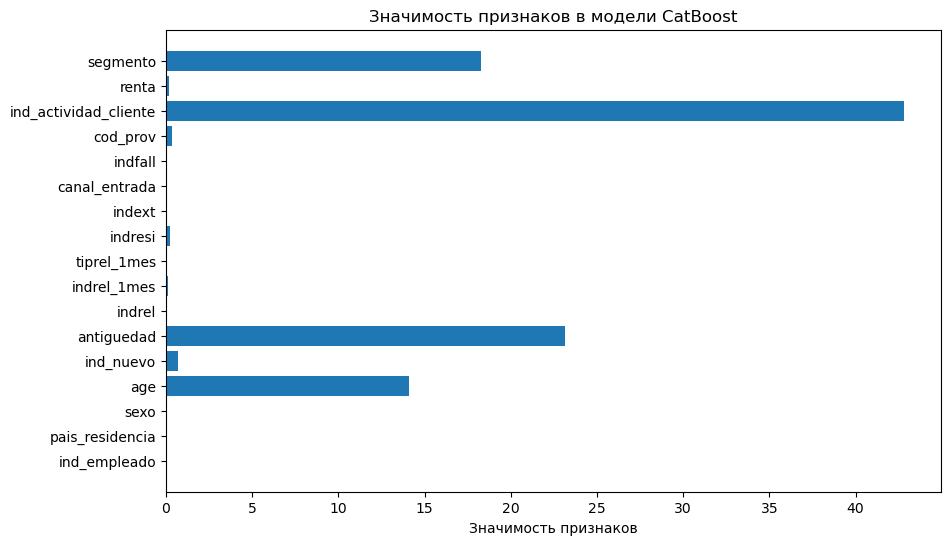

In [180]:
# Важность признаков
feature_importances = best_model.get_feature_importance(
    Pool(
        X_train,
        label=y_train,
        cat_features=['ind_empleado', 'pais_residencia', 'tiprel_1mes', 'canal_entrada', 'indfall', 'segmento'],
    )
)
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Значимость признаков')
plt.title('Значимость признаков в модели CatBoost')
plt.show()

Мы получили, что наиболее значимыми признакми являются:
1. ind_actividad_cliente — активность пользователя
2. antiguedad — cтаж клиента (в месяцах)
3. segmento — сегментация (VIP, обыкновенные, выпускники колледжей)
4. age — возраст

In [182]:
# Обучим финальную модель на всем датасете. 
# Для этого будем использовать только наиболее значимые признаки и параметры лучшей модели.
interactions = pd.read_parquet("data_transformed.parquet").sample(frac=0.01, random_state=42)

X = interactions[['segmento', 'ind_actividad_cliente', 'antiguedad', 'age']]
y = interactions[product_cols]

final_model = CatBoostClassifier(
    cat_features=['segmento'],
    loss_function='MultiLogloss',
    verbose=10,
    thread_count=-1,
    random_seed=42,
    **grid_search.best_params_
)
final_model.fit(X, y)

0:	learn: 0.6845620	total: 534ms	remaining: 52.9s
10:	learn: 0.6071075	total: 7.26s	remaining: 58.8s
20:	learn: 0.5425975	total: 13.9s	remaining: 52.4s
30:	learn: 0.4883133	total: 20.8s	remaining: 46.3s
40:	learn: 0.4420525	total: 27.6s	remaining: 39.7s
50:	learn: 0.4022455	total: 34.8s	remaining: 33.4s
60:	learn: 0.3679244	total: 42.1s	remaining: 26.9s
70:	learn: 0.3381166	total: 48.8s	remaining: 19.9s
80:	learn: 0.3121108	total: 55.6s	remaining: 13s
90:	learn: 0.2893549	total: 1m 2s	remaining: 6.19s
99:	learn: 0.2712189	total: 1m 8s	remaining: 0us


In [187]:
# Измерим метрики для финальной модели
accuracy = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')

0:	learn: 0.6845397	total: 503ms	remaining: 49.8s
10:	learn: 0.6071982	total: 5.58s	remaining: 45.2s
20:	learn: 0.5428252	total: 10.2s	remaining: 38.3s
30:	learn: 0.4885252	total: 15.3s	remaining: 34.1s
40:	learn: 0.4421273	total: 20.9s	remaining: 30.1s
50:	learn: 0.4026173	total: 25.9s	remaining: 24.9s
60:	learn: 0.3682080	total: 31.2s	remaining: 19.9s
70:	learn: 0.3383806	total: 35.9s	remaining: 14.7s
80:	learn: 0.3123220	total: 41.2s	remaining: 9.65s
90:	learn: 0.2894295	total: 46.4s	remaining: 4.59s
99:	learn: 0.2712840	total: 51.2s	remaining: 0us
0:	learn: 0.6845430	total: 520ms	remaining: 51.5s
10:	learn: 0.6072261	total: 10.2s	remaining: 1m 22s
20:	learn: 0.5428732	total: 20.3s	remaining: 1m 16s
30:	learn: 0.4885888	total: 30s	remaining: 1m 6s
40:	learn: 0.4422057	total: 42s	remaining: 1m
50:	learn: 0.4027072	total: 47.9s	remaining: 46s
60:	learn: 0.3683106	total: 54s	remaining: 34.5s
70:	learn: 0.3384940	total: 59.1s	remaining: 24.1s
80:	learn: 0.3124249	total: 1m 7s	remaining:

/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/supervoid/anaconda3/lib/python3.11/site-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/Users/supervoid/anaconda3/lib/

In [188]:
f1 = cross_val_score(final_model, X, y, cv=5, scoring='f1_weighted')

0:	learn: 0.6845397	total: 639ms	remaining: 1m 3s
10:	learn: 0.6071982	total: 5.39s	remaining: 43.6s
20:	learn: 0.5428252	total: 9.84s	remaining: 37s
30:	learn: 0.4885252	total: 14.3s	remaining: 31.9s
40:	learn: 0.4421273	total: 19.3s	remaining: 27.7s
50:	learn: 0.4026173	total: 23.4s	remaining: 22.5s
60:	learn: 0.3682080	total: 28.2s	remaining: 18s
70:	learn: 0.3383806	total: 32.8s	remaining: 13.4s
80:	learn: 0.3123220	total: 37.6s	remaining: 8.81s
90:	learn: 0.2894295	total: 42.4s	remaining: 4.2s
99:	learn: 0.2712840	total: 46.9s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6845430	total: 477ms	remaining: 47.2s
10:	learn: 0.6072261	total: 5.22s	remaining: 42.3s
20:	learn: 0.5428732	total: 9.58s	remaining: 36s
30:	learn: 0.4885888	total: 14s	remaining: 31.1s
40:	learn: 0.4422057	total: 18.5s	remaining: 26.6s
50:	learn: 0.4027072	total: 22.4s	remaining: 21.5s
60:	learn: 0.3683106	total: 27.2s	remaining: 17.4s
70:	learn: 0.3384940	total: 31.9s	remaining: 13s
80:	learn: 0.3124249	total: 36.7s	remaining: 8.62s
90:	learn: 0.2895399	total: 41.7s	remaining: 4.13s
99:	learn: 0.2714035	total: 46s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6845399	total: 518ms	remaining: 51.3s
10:	learn: 0.6072031	total: 5.5s	remaining: 44.5s
20:	learn: 0.5428333	total: 10.1s	remaining: 37.9s
30:	learn: 0.4885340	total: 14.7s	remaining: 32.6s
40:	learn: 0.4421376	total: 19.5s	remaining: 28.1s
50:	learn: 0.4026277	total: 23.4s	remaining: 22.5s
60:	learn: 0.3682124	total: 28.3s	remaining: 18.1s
70:	learn: 0.3384053	total: 33.2s	remaining: 13.5s
80:	learn: 0.3124477	total: 39.8s	remaining: 9.34s
90:	learn: 0.2895753	total: 44.5s	remaining: 4.4s
99:	learn: 0.2713806	total: 48.6s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0:	learn: 0.6845459	total: 547ms	remaining: 54.2s
10:	learn: 0.6072133	total: 4.74s	remaining: 38.4s
20:	learn: 0.5428426	total: 8.84s	remaining: 33.3s
30:	learn: 0.4885441	total: 13.1s	remaining: 29.2s
40:	learn: 0.4422053	total: 17.7s	remaining: 25.4s
50:	learn: 0.4025927	total: 21.8s	remaining: 20.9s
60:	learn: 0.3682615	total: 26.3s	remaining: 16.8s
70:	learn: 0.3383901	total: 30.8s	remaining: 12.6s
80:	learn: 0.3123572	total: 35.3s	remaining: 8.29s
90:	learn: 0.2896025	total: 39.8s	remaining: 3.93s
99:	learn: 0.2714667	total: 43.7s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_scor

In [205]:
precision = cross_val_score(final_model, X, y, cv=5, scoring='precision_weighted')

0:	learn: 0.6845397	total: 469ms	remaining: 46.4s
10:	learn: 0.6071982	total: 4.44s	remaining: 35.9s
20:	learn: 0.5428252	total: 7.93s	remaining: 29.8s
30:	learn: 0.4885252	total: 11.5s	remaining: 25.5s
40:	learn: 0.4421273	total: 15.3s	remaining: 22.1s
50:	learn: 0.4026173	total: 18.5s	remaining: 17.7s
60:	learn: 0.3682080	total: 22.5s	remaining: 14.4s
70:	learn: 0.3383806	total: 26.3s	remaining: 10.7s
80:	learn: 0.3123220	total: 30.4s	remaining: 7.13s
90:	learn: 0.2894295	total: 34.5s	remaining: 3.42s
99:	learn: 0.2712840	total: 38.3s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.6845430	total: 496ms	remaining: 49.1s
10:	learn: 0.6072261	total: 4.55s	remaining: 36.8s
20:	learn: 0.5428732	total: 8.39s	remaining: 31.6s
30:	learn: 0.4885888	total: 12.4s	remaining: 27.5s
40:	learn: 0.4422057	total: 16.8s	remaining: 24.2s
50:	learn: 0.4027072	total: 20.4s	remaining: 19.6s
60:	learn: 0.3683106	total: 24.8s	remaining: 15.9s
70:	learn: 0.3384940	total: 28.9s	remaining: 11.8s
80:	learn: 0.3124249	total: 33.3s	remaining: 7.8s
90:	learn: 0.2895399	total: 38.4s	remaining: 3.79s
99:	learn: 0.2714035	total: 42.5s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.6845399	total: 498ms	remaining: 49.3s
10:	learn: 0.6072031	total: 4.78s	remaining: 38.6s
20:	learn: 0.5428333	total: 8.77s	remaining: 33s
30:	learn: 0.4885340	total: 13.5s	remaining: 30s
40:	learn: 0.4421376	total: 19s	remaining: 27.3s
50:	learn: 0.4026277	total: 23.2s	remaining: 22.3s
60:	learn: 0.3682124	total: 28.7s	remaining: 18.4s
70:	learn: 0.3384053	total: 33.2s	remaining: 13.6s
80:	learn: 0.3124477	total: 38.1s	remaining: 8.94s
90:	learn: 0.2895753	total: 42.9s	remaining: 4.25s
99:	learn: 0.2713806	total: 47.2s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.6845459	total: 527ms	remaining: 52.1s
10:	learn: 0.6072133	total: 4.89s	remaining: 39.6s
20:	learn: 0.5428426	total: 8.95s	remaining: 33.7s
30:	learn: 0.4885441	total: 14.4s	remaining: 31.9s
40:	learn: 0.4422053	total: 19.7s	remaining: 28.3s
50:	learn: 0.4025927	total: 24.6s	remaining: 23.6s
60:	learn: 0.3682615	total: 29.6s	remaining: 18.9s
70:	learn: 0.3383901	total: 34.5s	remaining: 14.1s
80:	learn: 0.3123572	total: 39.4s	remaining: 9.23s
90:	learn: 0.2896025	total: 44s	remaining: 4.35s
99:	learn: 0.2714667	total: 48.1s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_tr

In [206]:
recall = cross_val_score(final_model, X, y, cv=5, scoring='recall_weighted')

0:	learn: 0.6845397	total: 485ms	remaining: 48s
10:	learn: 0.6071982	total: 5.02s	remaining: 40.7s
20:	learn: 0.5428252	total: 9.28s	remaining: 34.9s
30:	learn: 0.4885252	total: 13.5s	remaining: 30s
40:	learn: 0.4421273	total: 18.1s	remaining: 26s
50:	learn: 0.4026173	total: 21.8s	remaining: 20.9s
60:	learn: 0.3682080	total: 26.4s	remaining: 16.9s
70:	learn: 0.3383806	total: 31s	remaining: 12.6s
80:	learn: 0.3123220	total: 35.5s	remaining: 8.33s
90:	learn: 0.2894295	total: 40.2s	remaining: 3.97s
99:	learn: 0.2712840	total: 44.5s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.6845430	total: 544ms	remaining: 53.9s
10:	learn: 0.6072261	total: 5.28s	remaining: 42.7s
20:	learn: 0.5428732	total: 9.43s	remaining: 35.5s
30:	learn: 0.4885888	total: 13.8s	remaining: 30.8s
40:	learn: 0.4422057	total: 18.5s	remaining: 26.7s
50:	learn: 0.4027072	total: 22.3s	remaining: 21.5s
60:	learn: 0.3683106	total: 27.1s	remaining: 17.3s
70:	learn: 0.3384940	total: 31.6s	remaining: 12.9s
80:	learn: 0.3124249	total: 36.4s	remaining: 8.53s
90:	learn: 0.2895399	total: 41s	remaining: 4.05s
99:	learn: 0.2714035	total: 45.2s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.6845399	total: 541ms	remaining: 53.5s
10:	learn: 0.6072031	total: 5.23s	remaining: 42.3s
20:	learn: 0.5428333	total: 9.44s	remaining: 35.5s
30:	learn: 0.4885340	total: 13.7s	remaining: 30.4s
40:	learn: 0.4421376	total: 18.3s	remaining: 26.3s
50:	learn: 0.4026277	total: 22s	remaining: 21.1s
60:	learn: 0.3682124	total: 26.6s	remaining: 17s
70:	learn: 0.3384053	total: 31s	remaining: 12.7s
80:	learn: 0.3124477	total: 37.8s	remaining: 8.88s
90:	learn: 0.2895753	total: 44.2s	remaining: 4.37s
99:	learn: 0.2713806	total: 49.2s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0:	learn: 0.6845459	total: 918ms	remaining: 1m 30s
10:	learn: 0.6072133	total: 5.27s	remaining: 42.7s
20:	learn: 0.5428426	total: 9.93s	remaining: 37.4s
30:	learn: 0.4885441	total: 14.3s	remaining: 31.9s
40:	learn: 0.4422053	total: 18.8s	remaining: 27.1s
50:	learn: 0.4025927	total: 23s	remaining: 22.1s
60:	learn: 0.3682615	total: 27.7s	remaining: 17.7s
70:	learn: 0.3383901	total: 32.3s	remaining: 13.2s
80:	learn: 0.3123572	total: 37s	remaining: 8.67s
90:	learn: 0.2896025	total: 41.6s	remaining: 4.12s
99:	learn: 0.2714667	total: 45.7s	remaining: 0us


/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/supervoid/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_t

In [207]:
accuracy = accuracy[pd.notna(accuracy)].mean()
f1 = f1[pd.notna(f1)].mean()
precision = precision[pd.notna(precision)].mean()
recall = recall[pd.notna(recall)].mean()

print(f"Accuracy: {accuracy}")
print(f"F1-Score (Weighted): {f1")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")

Accuracy: 0.5074609003221195
F1-Score (Weighted): 0.381444982932013
Precision (Weighted): 0.3597845873311266
Recall (Weighted): 0.41178253618500765


In [192]:
metrics_final = {
    "accuracy": accuracy,
    "f1": f1,
    "precision": precision,
    "recall": recall
}

In [208]:
# Сохраним результаты в MLFlow

cb_model.save_model('artifacts/catboost_model.bin')

REGISTRY_MODEL_NAME = 'catboost_model'

if mlflow.get_experiment_by_name(EXPERIMENT_NAME):
    experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
else:
    experiment_id = mlflow.create_experiment(name=EXPERIMENT_NAME)

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    mlflow.log_metrics(metrics_final)

    model_info = mlflow.sklearn.log_model( 
        sk_model=cb_model,
        artifact_path="artifacts",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        await_registration_for=60,
    )

Registered model 'catboost_model' already exists. Creating a new version of this model...
2024/12/09 01:46:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 60 seconds for model version to finish creation. Model name: catboost_model, version 4


🏃 View run eda_model at: http://127.0.0.1:5000/#/experiments/1/runs/36dd20d9f6b441de93e5848e54de9b70
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Created version '4' of model 'catboost_model'.


# Выводы

Таким образом, мы провели первичный анализ данных, очистили их и подготовли для работы, визуализировали распределения и зафиксировали найденные закономерности. 

Затем обучили несколько моделей и выбрали из них лучшую. Ею оказалась Catboost. Мы подобрали оптимальные параметры из матрицы параметров.

Наконец, мы отобрали значимые признаки и обучили финальную модель. Так наиболее значимыми признаками оказались: активность клиента, его cтаж, сегмент (VIP, обыкновенные, выпускники колледжей) и возраст. 

Все артефакты и метрики были сохранены в MLFlow для воспроизводимости экспериментов.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Ты проделал основательную работу над задачей классификации. От предварительной обработки данных до обучения и оптимизации моделей твой подход был систематичным и продуманным. Ты грамотно использовал возможности CatBoost для работы с категориальными признаками, обеспечил воспроизводимость экспериментов через MLFlow и провел анализ значимости признаков, что добавляет глубины твоей работе.

Однако важно учитывать, что качество финальной модели оказалось не самым высоким. Это может быть связано с ограниченным числом отобранных признаков и особенностями данных. Также есть моменты, которые стоит доработать: например, более тщательно обрабатывать пропуски и аномалии в данных, дополнительно проверить балансировку классов и разнообразить подходы к оптимизации гиперпараметров. Низкие метрики указывают на то, что есть потенциал для улучшения, например, за счет использования дополнительных признаков или альтернативных методов работы с несбалансированными данными.

Так же я заметил довольно таки серьезную ошибку с переменной модели, которую видимо ты случайно перепутал с другой, это нужно будет обязательно исправить. Все замечания я оставил в коде.

В целом твоя работа демонстрирует хороший уровень понимания методов машинного обучения и умение решать реальные задачи. Ты на правильном пути, буду ждать твой проект с исправлениями обратно!

</div>


